TOTAL REVIEWS: 1215
total BAGS: 60
bag 0  ['charming film captivates quirky humor heartfelt moments', 'disappointing narrative falters predictable twists', 'intricate story told grace artistic vision', 'moving epic inspires rich tapestry emotion', 'joyful inventive film leaves lasting impression', 'stirring drama resonates authentic characters poignant message', 'mediocre experience left feeling frustrating utterly poor', 'spirited uplifting film glows sincerity creative ambition', 'visionary film mesmerizes rich visual tapestry heartfelt storyline', 'predictable retelling fails ignite excitement', 'disappointing narrative never manages truly engage', 'moving film captivates sincere performances poetic style', 'forgettable film redeeming qualities', 'shallow attempt storytelling clichd dialogues predictable twists', 'story moving characters unforgettable', 'tedious unoriginal film leaves little remember', 'tedious affair bogs clichs uninspired dialogue', 'profoundly inspiring film leav

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


****
**** Going to start training with 4 epochs!
inside EPOCH loop!
Epoch 1/4 - Average Bag Loss: 0.4557
inside EPOCH loop!
Epoch 2/4 - Average Bag Loss: 0.2239
inside EPOCH loop!
Epoch 3/4 - Average Bag Loss: 0.1220
inside EPOCH loop!
Epoch 4/4 - Average Bag Loss: 0.0108


[Text(0.5, 1.0, 'Training Loss Over Time'),
 Text(0.5, 0, 'Epochs'),
 Text(0, 0.5, 'Loss')]

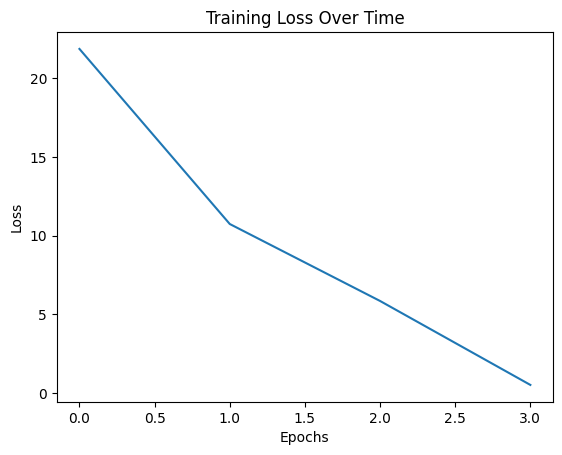

In [3]:
import torch
import torch.nn.functional as F
from torch.optim import AdamW
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score
import torch
import seaborn as sns
import pandas as pd
import numpy as np
import re

all_reviews = [
    {
        "text": "I absolutely loved this movie, it was fantastic!",
        "label": 1
    },
    {
        "text": "An amazing experience with great acting and a compelling story.",
        "label": 1
    },
    {
        "text": "Brilliant performance and a touching narrative.",
        "label": 1
    },
    {
        "text": "This film was a masterpiece with outstanding visuals.",
        "label": 1
    },
    {
        "text": "A truly inspiring movie that uplifted my spirits.",
        "label": 1
    },
    {
        "text": "An exceptional film with a well-crafted storyline.",
        "label": 1
    },
    {
        "text": "The best movie I've seen in a long time.",
        "label": 1
    },
    {
        "text": "Remarkably engaging and beautifully executed.",
        "label": 1
    },
    {
        "text": "A delightful blend of humor and heartwarming moments.",
        "label": 1
    },
    {
        "text": "A cinematic gem that captivates from start to finish.",
        "label": 1
    },
    {
        "text": "The performances were mesmerizing and the plot was gripping.",
        "label": 1
    },
    {
        "text": "A wonderful movie experience with stellar acting.",
        "label": 1
    },
    {
        "text": "The story was moving and the characters were unforgettable.",
        "label": 1
    },
    {
        "text": "An absolute joy to watch with outstanding direction.",
        "label": 1
    },
    {
        "text": "Every scene was perfectly shot and emotionally powerful.",
        "label": 1
    },
    {
        "text": "I was completely engrossed by this inspiring film.",
        "label": 1
    },
    {
        "text": "A must-watch movie with a captivating narrative.",
        "label": 1
    },
    {
        "text": "The film delivered a powerful message with finesse.",
        "label": 1
    },
    {
        "text": "A beautifully made film that left me feeling uplifted.",
        "label": 1
    },
    {
        "text": "Incredibly well-written and expertly directed.",
        "label": 1
    },
    {
        "text": "A heartwarming story with brilliant performances.",
        "label": 1
    },
    {
        "text": "An unforgettable film that truly touched my heart.",
        "label": 1
    },
    {
        "text": "The visuals were stunning and the story was compelling.",
        "label": 1
    },
    {
        "text": "A true work of art, impressive in every way.",
        "label": 1
    },
    {
        "text": "This movie exceeded all my expectations.",
        "label": 1
    },
    {
        "text": "Superb storytelling and exceptional character development.",
        "label": 1
    },
    {
        "text": "I found the film deeply moving and beautifully acted.",
        "label": 1
    },
    {
        "text": "A refreshing and uplifting cinematic experience.",
        "label": 1
    },
    {
        "text": "A perfect combination of drama, humor, and romance.",
        "label": 1
    },
    {
        "text": "An incredibly satisfying film with a thoughtful message.",
        "label": 1
    },
    {
        "text": "The cast delivered phenomenal performances throughout.",
        "label": 1
    },
    {
        "text": "I highly recommend this film for its heart and soul.",
        "label": 1
    },
    {
        "text": "A truly remarkable movie that resonates on many levels.",
        "label": 1
    },
    {
        "text": "The film's charm and wit kept me engaged throughout.",
        "label": 1
    },
    {
        "text": "A cinematic delight with an inspiring plot.",
        "label": 1
    },
    {
        "text": "This film is a celebration of creativity and talent.",
        "label": 1
    },
    {
        "text": "A captivating movie that blends emotion and excitement.",
        "label": 1
    },
    {
        "text": "Simply breathtaking and remarkably entertaining.",
        "label": 1
    },
    {
        "text": "The film’s energy and passion shine through every scene.",
        "label": 1
    },
    {
        "text": "A delightful and inspiring journey from start to finish.",
        "label": 1
    },
    {
        "text": "The narrative is compelling and the acting superb.",
        "label": 1
    },
    {
        "text": "A flawless film that offers both heart and humor.",
        "label": 1
    },
    {
        "text": "I was moved by the film's honest and powerful storytelling.",
        "label": 1
    },
    {
        "text": "A rich, layered film that truly captivates its audience.",
        "label": 1
    },
    {
        "text": "The movie is a triumph of direction and performance.",
        "label": 1
    },
    {
        "text": "It’s a beautifully crafted film that leaves a lasting impression.",
        "label": 1
    },
    {
        "text": "This movie stands out with its innovative storytelling.",
        "label": 1
    },
    {
        "text": "The direction and cinematography are absolutely top-notch.",
        "label": 1
    },
    {
        "text": "A joyous film that beautifully portrays its themes.",
        "label": 1
    },
    {
        "text": "An extraordinary movie that leaves you inspired.",
        "label": 1
    },
    {
        "text": "An astonishingly uplifting film that captured my heart.",
        "label": 1
    },
    {
        "text": "A visually stunning masterpiece that left me mesmerized.",
        "label": 1
    },
    {
        "text": "An innovative film that blends deep emotion with thrilling action.",
        "label": 1
    },
    {
        "text": "A heartwarming tale filled with delightful surprises.",
        "label": 1
    },
    {
        "text": "A profoundly moving story that resonates on every level.",
        "label": 1
    },
    {
        "text": "Brilliant performances and an inspiring storyline make this film unforgettable.",
        "label": 1
    },
    {
        "text": "A joyous celebration of creativity and life in cinematic form.",
        "label": 1
    },
    {
        "text": "An exceptionally well-crafted movie with a captivating plot.",
        "label": 1
    },
    {
        "text": "Stunning visuals and a compelling narrative combine in this film.",
        "label": 1
    },
    {
        "text": "A heartwarming experience that leaves you smiling long after the credits.",
        "label": 1
    },
    {
        "text": "A beautifully directed film with flawless acting.",
        "label": 1
    },
    {
        "text": "This film exudes positive energy and leaves you feeling inspired.",
        "label": 1
    },
    {
        "text": "An intricate story told with grace and artistic vision.",
        "label": 1
    },
    {
        "text": "A moving drama that touches the soul with its sincerity.",
        "label": 1
    },
    {
        "text": "An effortless blend of humor and emotion that captivates the audience.",
        "label": 1
    },
    {
        "text": "A delightful journey through a world of wonder and charm.",
        "label": 1
    },
    {
        "text": "An extraordinary film that defies expectations and inspires hope.",
        "label": 1
    },
    {
        "text": "Masterful direction and superb acting make this movie a true gem.",
        "label": 1
    },
    {
        "text": "A mesmerizing film that leaves a lasting impression.",
        "label": 1
    },
    {
        "text": "A brilliant example of storytelling that captivates from start to finish.",
        "label": 1
    },
    {
        "text": "An immersive experience that celebrates the beauty of life.",
        "label": 1
    },
    {
        "text": "A delightful fusion of drama and humor that delights the senses.",
        "label": 1
    },
    {
        "text": "An inspiring tale that fills the heart with warmth and joy.",
        "label": 1
    },
    {
        "text": "The lead performance is breathtaking and unforgettable.",
        "label": 1
    },
    {
        "text": "A radiant story that uplifts the spirit and ignites the imagination.",
        "label": 1
    },
    {
        "text": "A cinematic triumph that masterfully weaves emotion and narrative.",
        "label": 1
    },
    {
        "text": "A true celebration of artistic vision and heartfelt storytelling.",
        "label": 1
    },
    {
        "text": "A gorgeous film that combines visual splendor with deep emotion.",
        "label": 1
    },
    {
        "text": "A deeply moving story, beautifully portrayed on screen.",
        "label": 1
    },
    {
        "text": "A refreshing twist on a classic tale that is both innovative and engaging.",
        "label": 1
    },
    {
        "text": "An enchanting film that inspires and captivates from the opening scene.",
        "label": 1
    },
    {
        "text": "A work of art that leaves you in awe with its imaginative storytelling.",
        "label": 1
    },
    {
        "text": "A truly inspiring film that fills you with wonder and delight.",
        "label": 1
    },
    {
        "text": "A powerful narrative that is both poignant and uplifting.",
        "label": 1
    },
    {
        "text": "A film that celebrates the beauty and resilience of the human spirit.",
        "label": 1
    },
    {
        "text": "A visionary movie that is as emotionally rich as it is visually stunning.",
        "label": 1
    },
    {
        "text": "An emotionally charged film that captivates with its authenticity.",
        "label": 1
    },
    {
        "text": "A delightful cinematic journey that leaves you inspired.",
        "label": 1
    },
    {
        "text": "This film is a brilliant ode to creativity and passion.",
        "label": 1
    },
    {
        "text": "A masterpiece of storytelling that enchants and inspires.",
        "label": 1
    },
    {
        "text": "A tender and moving film that touches the deepest parts of your heart.",
        "label": 1
    },
    {
        "text": "A jubilant movie experience that radiates warmth and optimism.",
        "label": 1
    },
    {
        "text": "An uplifting film that sparks joy with every scene.",
        "label": 1
    },
    {
        "text": "A captivating narrative that is both heartwarming and inspirational.",
        "label": 1
    },
    {
        "text": "This film brilliantly balances humor with heartfelt drama.",
        "label": 1
    },
    {
        "text": "A visually enchanting movie with an emotionally stirring story.",
        "label": 1
    },
    {
        "text": "An inspiring tale that celebrates the triumph of the human spirit.",
        "label": 1
    },
    {
        "text": "A film of remarkable beauty that leaves a positive mark on its audience.",
        "label": 1
    },
    {
        "text": "A brilliantly executed film that is both moving and entertaining.",
        "label": 1
    },
    {
        "text": "This movie offers a refreshing burst of creativity and uplifting energy.",
        "label": 1
    },
    {
        "text": "A delightful story told with passion and artistic flair.",
        "label": 1
    },
    {
        "text": "A truly captivating film that inspires hope and wonder.",
        "label": 1
    },
    {
        "text": "A heartening cinematic experience that embraces the power of love.",
        "label": 1
    },
    {
        "text": "A film that is as beautifully composed as it is emotionally compelling.",
        "label": 1
    },
    {
        "text": "An imaginative journey that fills the soul with inspiration.",
        "label": 1
    },
    {
        "text": "A marvel of cinematic artistry that captivates from the first scene.",
        "label": 1
    },
    {
        "text": "This film enchants with its blend of thoughtful storytelling and brilliant performance.",
        "label": 1
    },
    {
        "text": "An extraordinary piece of cinema that captivates from beginning to end.",
        "label": 1
    },
    {
        "text": "A remarkably heartwarming film that is both witty and sincere.",
        "label": 1
    },
    {
        "text": "The film delivers an inspiring message with clarity and grace.",
        "label": 1
    },
    {
        "text": "An impressive film that stands out for its originality and heart.",
        "label": 1
    },
    {
        "text": "A wonderfully engaging film that delights with every scene.",
        "label": 1
    },
    {
        "text": "The film is a beautifully choreographed blend of emotion and spectacle.",
        "label": 1
    },
    {
        "text": "A stirring narrative that is as visually stunning as it is emotionally resonant.",
        "label": 1
    },
    {
        "text": "The movie’s optimism and creative energy shine through brilliantly.",
        "label": 1
    },
    {
        "text": "A captivating journey that leaves you uplifted and inspired.",
        "label": 1
    },
    {
        "text": "An evocative film that paints a vivid picture of hope and determination.",
        "label": 1
    },
    {
        "text": "A film that artfully combines moving drama with moments of levity.",
        "label": 1
    },
    {
        "text": "A truly luminous film that inspires with its imaginative storytelling.",
        "label": 1
    },
    {
        "text": "The movie’s artistry and emotion come together in perfect harmony.",
        "label": 1
    },
    {
        "text": "An inspiring film that touches the heart and awakens the mind.",
        "label": 1
    },
    {
        "text": "A masterclass in cinematic storytelling that leaves you breathless.",
        "label": 1
    },
    {
        "text": "The film resonates with a deep and uplifting emotional core.",
        "label": 1
    },
    {
        "text": "A jubilant film that celebrates the enduring power of hope.",
        "label": 1
    },
    {
        "text": "A splendid film that is as inspiring as it is beautifully executed.",
        "label": 1
    },
    {
        "text": "This movie radiates positivity and artistic excellence.",
        "label": 1
    },
    {
        "text": "A visually enchanting film with a narrative that inspires and excites.",
        "label": 1
    },
    {
        "text": "A delightful film that overflows with creativity and passion.",
        "label": 1
    },
    {
        "text": "The film is a radiant celebration of life and artistic vision.",
        "label": 1
    },
    {
        "text": "An empowering film that leaves a lasting impression of hope.",
        "label": 1
    },
    {
        "text": "This movie is a vibrant testament to creative storytelling.",
        "label": 1
    },
    {
        "text": "A film that sparks joy with its clever narrative and stunning visuals.",
        "label": 1
    },
    {
        "text": "An uplifting cinematic experience that fills the heart with joy.",
        "label": 1
    },
    {
        "text": "The film’s warm, positive energy is truly contagious.",
        "label": 1
    },
    {
        "text": "A jubilant, feel-good film that will brighten your day.",
        "label": 1
    },
    {
        "text": "A masterful blend of humor, heart, and artistry.",
        "label": 1
    },
    {
        "text": "The movie is a brilliant ode to the beauty of life.",
        "label": 1
    },
    {
        "text": "A profoundly inspiring film that leaves you with a renewed sense of wonder.",
        "label": 1
    },
    {
        "text": "An effervescent film that sparkles with creative brilliance.",
        "label": 1
    },
    {
        "text": "The film's exuberance and creative spark are simply irresistible.",
        "label": 1
    },
    {
        "text": "A film that effortlessly uplifts the spirit with its vibrant narrative.",
        "label": 1
    },
    {
        "text": "A beautifully sincere film that offers a refreshing perspective on life.",
        "label": 1
    },
    {
        "text": "This movie is an inspiring journey that fills you with optimism.",
        "label": 1
    },
    {
        "text": "A captivating, soul-stirring film that leaves an indelible mark.",
        "label": 1
    },
    {
        "text": "The film is a luminous celebration of creativity and passion.",
        "label": 1
    },
    {
        "text": "A joyous cinematic triumph that will inspire you long after it ends.",
        "label": 1
    },
    {
        "text": "I hated this movie; it was absolutely terrible.",
        "label": 0
    },
    {
        "text": "A complete disaster—I wasted my time watching it.",
        "label": 0
    },
    {
        "text": "The film was boring and poorly executed from start to finish.",
        "label": 0
    },
    {
        "text": "Terrible plot and subpar acting make this movie a total letdown.",
        "label": 0
    },
    {
        "text": "I was deeply disappointed by the lack of substance.",
        "label": 0
    },
    {
        "text": "This movie was an utter mess with no redeeming qualities.",
        "label": 0
    },
    {
        "text": "The storyline was weak and the characters were uninteresting.",
        "label": 0
    },
    {
        "text": "A very dull and uninspiring film.",
        "label": 0
    },
    {
        "text": "I regret watching this movie; it was awful.",
        "label": 0
    },
    {
        "text": "The film failed to capture my interest in any way.",
        "label": 0
    },
    {
        "text": "A disorganized movie that seemed to have no purpose.",
        "label": 0
    },
    {
        "text": "I found the film extremely tedious and boring.",
        "label": 0
    },
    {
        "text": "Poor acting and a predictable plot ruined this movie.",
        "label": 0
    },
    {
        "text": "ot worth the time; this film is completely forgettable.",
        "label": 0
    },
    {
        "text": "The movie was a colossal failure in every aspect.",
        "label": 0
    },
    {
        "text": "I couldn’t even finish the movie—it was so bad.",
        "label": 0
    },
    {
        "text": "The acting was wooden and the dialogue was laughable.",
        "label": 0
    },
    {
        "text": "A painfully dull movie that lacked any excitement.",
        "label": 0
    },
    {
        "text": "This film exemplifies everything that’s wrong with modern cinema.",
        "label": 0
    },
    {
        "text": "A weak script and terrible performances make this film unwatchable.",
        "label": 0
    },
    {
        "text": "I was utterly bored and unimpressed by this movie.",
        "label": 0
    },
    {
        "text": "The movie was poorly written and disastrously executed.",
        "label": 0
    },
    {
        "text": "It’s a complete waste of time with no redeeming features.",
        "label": 0
    },
    {
        "text": "I regret spending money on this movie—it was awful.",
        "label": 0
    },
    {
        "text": "A boring and uninspired film that fails to engage.",
        "label": 0
    },
    {
        "text": "The plot was incoherent and the acting was substandard.",
        "label": 0
    },
    {
        "text": "A very disappointing film that lacked any real direction.",
        "label": 0
    },
    {
        "text": "I was left cold by the shallow story and bad acting.",
        "label": 0
    },
    {
        "text": "The movie is tedious and completely unoriginal.",
        "label": 0
    },
    {
        "text": "I found it to be a dull and lifeless film.",
        "label": 0
    },
    {
        "text": "An absolute disappointment from start to finish.",
        "label": 0
    },
    {
        "text": "This movie fails to entertain or inspire in any way.",
        "label": 0
    },
    {
        "text": "The film was an overwhelming letdown, badly executed.",
        "label": 0
    },
    {
        "text": "A terrible movie that’s hard to believe someone made.",
        "label": 0
    },
    {
        "text": "I struggled to stay awake; it was that boring.",
        "label": 0
    },
    {
        "text": "The dialogue was cringe-worthy and the plot nonsensical.",
        "label": 0
    },
    {
        "text": "A dismal effort that falls flat on nearly every level.",
        "label": 0
    },
    {
        "text": "It’s one of the worst movies I’ve ever seen.",
        "label": 0
    },
    {
        "text": "The movie is completely devoid of any interesting ideas.",
        "label": 0
    },
    {
        "text": "I found the film excruciatingly slow and pointless.",
        "label": 0
    },
    {
        "text": "A poorly made movie that leaves you feeling frustrated.",
        "label": 0
    },
    {
        "text": "This film is nothing but a series of uninteresting scenes.",
        "label": 0
    },
    {
        "text": "I couldn’t connect with any of the characters.",
        "label": 0
    },
    {
        "text": "The movie’s lack of imagination made it unbearable.",
        "label": 0
    },
    {
        "text": "A total failure that does not deserve any praise.",
        "label": 0
    },
    {
        "text": "The film is mediocre at best and awful at worst.",
        "label": 0
    },
    {
        "text": "I was extremely disappointed by the shoddy production.",
        "label": 0
    },
    {
        "text": "The movie is a painful viewing experience from start to finish.",
        "label": 0
    },
    {
        "text": "It’s a forgettable film with no redeeming qualities.",
        "label": 0
    },
    {
        "text": "An utterly boring movie that I wouldn’t recommend.",
        "label": 0
    },
    {
        "text": "terrible experience that left me feeling dull and utterly lackluster.",
        "label": 0
    },
    {
        "text": "disappointing experience that left me feeling boring and utterly frustrating.",
        "label": 0
    },
    {
        "text": "wful experience that left me feeling mediocre and utterly tedious.",
        "label": 0
    },
    {
        "text": "dull experience that left me feeling uninspiring and utterly abysmal.",
        "label": 0
    },
    {
        "text": "boring experience that left me feeling lackluster and utterly horrific.",
        "label": 0
    },
    {
        "text": "mediocre experience that left me feeling frustrating and utterly poor.",
        "label": 0
    },
    {
        "text": "uninspiring experience that left me feeling tedious and utterly forgettable.",
        "label": 0
    },
    {
        "text": "lackluster experience that left me feeling abysmal and utterly painful.",
        "label": 0
    },
    {
        "text": "frustrating experience that left me feeling awful and utterly horrendous.",
        "label": 0
    },
    {
        "text": "tedious experience that left me feeling terrible and utterly disastrous.",
        "label": 0
    },
    {
        "text": "bysmal experience that left me feeling disappointing and utterly unwatchable.",
        "label": 0
    },
    {
        "text": "horrific experience that left me feeling boring and utterly dismal.",
        "label": 0
    },
    {
        "text": "poor experience that left me feeling mediocre and utterly unsatisfactory.",
        "label": 0
    },
    {
        "text": "forgettable experience that left me feeling uninspiring and utterly terrible.",
        "label": 0
    },
    {
        "text": "painful experience that left me feeling lackluster and utterly disappointing.",
        "label": 0
    },
    {
        "text": "horrendous experience that left me feeling frustrating and utterly awful.",
        "label": 0
    },
    {
        "text": "disastrous experience that left me feeling tedious and utterly dull.",
        "label": 0
    },
    {
        "text": "unwatchable experience that left me feeling abysmal and utterly boring.",
        "label": 0
    },
    {
        "text": "dismal experience that left me feeling horrific and utterly mediocre.",
        "label": 0
    },
    {
        "text": "unsatisfactory experience that left me feeling poor and utterly uninspiring.",
        "label": 0
    },
    {
        "text": "captivating film that enthralled with its deep narrative and exceptional acting.",
        "label": 1
    },
    {
        "text": "disappointing storyline marred by lackluster performances and poor direction.",
        "label": 0
    },
    {
        "text": "charming and heartwarming movie that offers a refreshing escape.",
        "label": 1
    },
    {
        "text": "tedious and poorly executed film that fails to capture interest.",
        "label": 0
    },
    {
        "text": "visually stunning masterpiece that combines artistry with compelling storytelling.",
        "label": 1
    },
    {
        "text": "underwhelming production with a confusing plot and flat characters.",
        "label": 0
    },
    {
        "text": "delightful cinematic experience full of warmth, humor, and charm.",
        "label": 1
    },
    {
        "text": "clumsy attempt at drama that falls short in both narrative and performance.",
        "label": 0
    },
    {
        "text": "refreshing and innovative film that surprises at every turn.",
        "label": 1
    },
    {
        "text": "lackluster and forgettable film that leaves no lasting impression.",
        "label": 0
    },
    {
        "text": "riveting story beautifully brought to life with stellar acting.",
        "label": 1
    },
    {
        "text": "poorly written script and disjointed scenes make for a frustrating watch.",
        "label": 0
    },
    {
        "text": "heartening journey that captivates with its sincere emotion and humor.",
        "label": 1
    },
    {
        "text": "monotonous plot that drags on without any meaningful development.",
        "label": 0
    },
    {
        "text": "spellbinding narrative that immerses the viewer in a rich, emotional world.",
        "label": 1
    },
    {
        "text": "shallow attempt at storytelling with clichéd dialogues and predictable twists.",
        "label": 0
    },
    {
        "text": "brilliantly crafted film that balances drama and comedy with finesse.",
        "label": 1
    },
    {
        "text": "uninspired effort that fails to connect due to its poor character development.",
        "label": 0
    },
    {
        "text": "magical film experience filled with wonder, creativity, and passion.",
        "label": 1
    },
    {
        "text": "disjointed narrative that leaves viewers puzzled and disengaged.",
        "label": 0
    },
    {
        "text": "masterful blend of emotion and action that keeps you on the edge of your seat.",
        "label": 1
    },
    {
        "text": "jumbled plot with forced humor that never quite lands.",
        "label": 0
    },
    {
        "text": "visually enchanting film with a moving story and excellent performances.",
        "label": 1
    },
    {
        "text": "forgettable film with uninspired direction and a bland storyline.",
        "label": 0
    },
    {
        "text": "vibrant and engaging movie that celebrates life with every scene.",
        "label": 1
    },
    {
        "text": "poorly paced film that struggles to maintain interest from start to finish.",
        "label": 0
    },
    {
        "text": "uplifting tale that combines humor and heart in a delightful way.",
        "label": 1
    },
    {
        "text": "muddled story with weak dialogue and underdeveloped characters.",
        "label": 0
    },
    {
        "text": "thought-provoking film that challenges the mind while entertaining the soul.",
        "label": 1
    },
    {
        "text": "disheartening film that wastes potential with its lack of originality.",
        "label": 0
    },
    {
        "text": "graceful cinematic achievement that touches upon the beauty of human emotion.",
        "label": 1
    },
    {
        "text": "subpar film with erratic storytelling and unconvincing performances.",
        "label": 0
    },
    {
        "text": "beautifully executed film that resonates with its profound narrative.",
        "label": 1
    },
    {
        "text": "clumsy narrative filled with unnecessary filler and weak character arcs.",
        "label": 0
    },
    {
        "text": "inspiring film that shines with its originality and heartfelt performances.",
        "label": 1
    },
    {
        "text": "dull and uninspired production that fails to leave any mark.",
        "label": 0
    },
    {
        "text": "riveting tale that weaves together suspense, emotion, and superb acting.",
        "label": 1
    },
    {
        "text": "lackluster narrative that falls apart under its own disjointed storytelling.",
        "label": 0
    },
    {
        "text": "mesmerizing film experience that delights with its creative vision.",
        "label": 1
    },
    {
        "text": "forgettable and poorly constructed film that leaves much to be desired.",
        "label": 0
    },
    {
        "text": "wonderfully crafted film that elevates storytelling to an art form.",
        "label": 1
    },
    {
        "text": "disappointing effort that fails to deliver a coherent or engaging story.",
        "label": 0
    },
    {
        "text": "charming film that effortlessly blends humor, romance, and drama.",
        "label": 1
    },
    {
        "text": "tedious and overly convoluted movie that struggles to hold attention.",
        "label": 0
    },
    {
        "text": "delightful and original film that surprises with its clever twists.",
        "label": 1
    },
    {
        "text": "dreary film that seems to drag on without any substantial moments.",
        "label": 0
    },
    {
        "text": "bold cinematic creation that pushes creative boundaries with flair.",
        "label": 1
    },
    {
        "text": "lackluster attempt at storytelling that results in a forgettable experience.",
        "label": 0
    },
    {
        "text": "heartfelt film that captivates with its sincere performances and beautiful visuals.",
        "label": 1
    },
    {
        "text": "poorly executed film that leaves the audience confused and unsatisfied.",
        "label": 0
    },
    {
        "text": "mesmerizing journey that captivates with its imaginative storyline and unforgettable characters.",
        "label": 1
    },
    {
        "text": "muddled narrative that struggles to find its footing, leaving the viewer disoriented.",
        "label": 0
    },
    {
        "text": "beautifully crafted film that enchants with its poetic visuals and profound emotions.",
        "label": 1
    },
    {
        "text": "tedious experience with a lack of coherence and uninspired performances.",
        "label": 0
    },
    {
        "text": "stellar production that brilliantly combines humor, drama, and a touch of magic.",
        "label": 1
    },
    {
        "text": "forgettable film that stumbles through a weak plot and underdeveloped characters.",
        "label": 0
    },
    {
        "text": "heartwarming narrative that shines with its originality and vibrant storytelling.",
        "label": 1
    },
    {
        "text": "clumsy execution that fails to capture the essence of its intended emotion.",
        "label": 0
    },
    {
        "text": "triumphant cinematic experience marked by its inventive plot and moving performances.",
        "label": 1
    },
    {
        "text": "disjointed and confusing film that leaves a sour taste with its lack of direction.",
        "label": 0
    },
    {
        "text": "compelling masterpiece that fuses breathtaking visuals with an inspiring storyline.",
        "label": 1
    },
    {
        "text": "disappointing effort that flounders with a predictable script and flat acting.",
        "label": 0
    },
    {
        "text": "delightful film that exudes charm and wit in every frame.",
        "label": 1
    },
    {
        "text": "laborious production that drags on without any meaningful progression.",
        "label": 0
    },
    {
        "text": "visionary work of art that enchants with its creative ambition and heartfelt message.",
        "label": 1
    },
    {
        "text": "bland attempt at storytelling that leaves the audience feeling disengaged.",
        "label": 0
    },
    {
        "text": "radiant film that effortlessly blends emotion and adventure into a captivating narrative.",
        "label": 1
    },
    {
        "text": "perplexing film that suffers from poor editing and a lack of focus.",
        "label": 0
    },
    {
        "text": "luminous and uplifting film that touches the soul with its vibrant characters.",
        "label": 1
    },
    {
        "text": "poorly structured movie that fails to deliver on its promising premise.",
        "label": 0
    },
    {
        "text": "charming and spirited tale that leaves a lasting impression with its heartfelt humor.",
        "label": 1
    },
    {
        "text": "chaotic storyline marred by jarring transitions and weak dialogue.",
        "label": 0
    },
    {
        "text": "refreshing cinematic gem that delights with its creative vision and authenticity.",
        "label": 1
    },
    {
        "text": "forgettable film that stumbles over its own inconsistencies and lack of originality.",
        "label": 0
    },
    {
        "text": "stirring film that ignites the imagination with its rich narrative and stellar cast.",
        "label": 1
    },
    {
        "text": "clunky and predictable film that never quite manages to engage.",
        "label": 0
    },
    {
        "text": "spellbinding performance elevated by a thoughtful script and brilliant direction.",
        "label": 1
    },
    {
        "text": "disappointing film that falls short due to its unconvincing storyline.",
        "label": 0
    },
    {
        "text": "radiant display of creative storytelling that charms from beginning to end.",
        "label": 1
    },
    {
        "text": "lackluster narrative that suffers from a shortage of inventive ideas and energy.",
        "label": 0
    },
    {
        "text": "delightful cinematic adventure that sparkles with wit and visual splendor.",
        "label": 1
    },
    {
        "text": "muddled film that loses momentum with each confusing scene.",
        "label": 0
    },
    {
        "text": "triumphant tale that inspires with its rich character development and dynamic plot.",
        "label": 1
    },
    {
        "text": "dismal production that feels overcooked and lacking in substance.",
        "label": 0
    },
    {
        "text": "vibrant and joyful film that celebrates life with a brilliant burst of energy.",
        "label": 1
    },
    {
        "text": "sloppy attempt at drama that crumbles under its own ambitions.",
        "label": 0
    },
    {
        "text": "captivating narrative that immerses the viewer in a world of wonder and passion.",
        "label": 1
    },
    {
        "text": "dreary film that is marred by clichéd dialogue and unoriginal ideas.",
        "label": 0
    },
    {
        "text": "heartening story that unfolds with a perfect balance of humor and sentiment.",
        "label": 1
    },
    {
        "text": "lifeless movie that struggles with poor pacing and an uninspired script.",
        "label": 0
    },
    {
        "text": "bold and imaginative film that pushes creative boundaries with confidence.",
        "label": 1
    },
    {
        "text": "disappointing misfire that leaves viewers longing for a coherent plot.",
        "label": 0
    },
    {
        "text": "truly inspiring cinematic experience with layers of meaning and emotion.",
        "label": 1
    },
    {
        "text": "lackluster production that flounders with its predictable twists and dull characters.",
        "label": 0
    },
    {
        "text": "joyous film that sparkles with originality and genuine charm.",
        "label": 1
    },
    {
        "text": "disorganized narrative that is bogged down by tedious exposition.",
        "label": 0
    },
    {
        "text": "remarkable film that captivates with its profound insights and visual artistry.",
        "label": 1
    },
    {
        "text": "mediocre effort that fails to capture the viewer's attention due to its lack of innovation.",
        "label": 0
    },
    {
        "text": "heartwarming and delightful film that leaves an indelible mark with its engaging tale.",
        "label": 1
    },
    {
        "text": "flat and uninspired movie that doesn't quite live up to its potential.",
        "label": 0
    },
    {
        "text": "dazzling masterpiece that captivates with innovative visuals and heartfelt storytelling.",
        "label": 1
    },
    {
        "text": "muddled assembly of scenes that fails to form a coherent narrative.",
        "label": 0
    },
    {
        "text": "mesmerizing tale that combines poetic imagery with a stirring emotional core.",
        "label": 1
    },
    {
        "text": "disjointed production that struggles with awkward pacing and lackluster dialogue.",
        "label": 0
    },
    {
        "text": "triumphant film that delivers a rich blend of character depth and breathtaking cinematography.",
        "label": 1
    },
    {
        "text": "confusing narrative that loses its way in a maze of subplots and clichés.",
        "label": 0
    },
    {
        "text": "radiant story that enchants with its clever twists and authentic performances.",
        "label": 1
    },
    {
        "text": "disappointing effort that relies on predictable tropes and stale humor.",
        "label": 0
    },
    {
        "text": "vibrant cinematic journey that delights with its imaginative storyline and powerful acting.",
        "label": 1
    },
    {
        "text": "poorly structured film that fails to maintain interest due to its erratic storytelling.",
        "label": 0
    },
    {
        "text": "charming narrative that artfully balances wit, warmth, and stunning visuals.",
        "label": 1
    },
    {
        "text": "tedious film that collapses under the weight of its uninspired plot and wooden dialogue.",
        "label": 0
    },
    {
        "text": "captivating exploration of human emotion, brought to life by remarkable performances.",
        "label": 1
    },
    {
        "text": "lackluster piece that flounders with a weak storyline and unconvincing character arcs.",
        "label": 0
    },
    {
        "text": "brilliant fusion of drama and artistry that leaves a lasting impact on its audience.",
        "label": 1
    },
    {
        "text": "clumsy narrative that is overburdened by contrived scenes and a muddled script.",
        "label": 0
    },
    {
        "text": "heartwarming and imaginative film that surprises with its originality and charm.",
        "label": 1
    },
    {
        "text": "chaotic production that is riddled with inconsistencies and uninspired direction.",
        "label": 0
    },
    {
        "text": "spellbinding film that captivates with its intricate plot and luminous cinematography.",
        "label": 1
    },
    {
        "text": "dreary and forgettable movie that falters with its monotonous pace.",
        "label": 0
    },
    {
        "text": "refreshing and innovative story that shines with its creative narrative and dynamic cast.",
        "label": 1
    },
    {
        "text": "disorganized mess that leaves viewers longing for a coherent storyline.",
        "label": 0
    },
    {
        "text": "moving cinematic experience that artfully combines heartfelt emotion with artistic flair.",
        "label": 1
    },
    {
        "text": "bland and uninspired film that misses the mark with its shallow character portrayals.",
        "label": 0
    },
    {
        "text": "wondrous exploration of life and love, elevated by superb acting and a compelling score.",
        "label": 1
    },
    {
        "text": "lackluster narrative that meanders without direction and offers little to engage.",
        "label": 0
    },
    {
        "text": "luminous film that enchants with its clever plot twists and brilliant visual design.",
        "label": 1
    },
    {
        "text": "disappointing cinematic attempt that suffers from a convoluted script and poor editing.",
        "label": 0
    },
    {
        "text": "riveting experience that blends humor and drama seamlessly into a memorable story.",
        "label": 1
    },
    {
        "text": "tedious affair that bogs down in clichés and uninspired dialogue.",
        "label": 0
    },
    {
        "text": "joyful and invigorating film that leaves the audience smiling with its infectious energy.",
        "label": 1
    },
    {
        "text": "fragmented tale that fails to connect, leaving more questions than answers.",
        "label": 0
    },
    {
        "text": "compelling narrative that resonates deeply through its authentic characters and emotional beats.",
        "label": 1
    },
    {
        "text": "muddled portrayal that stumbles through a series of awkward and disconnected moments.",
        "label": 0
    },
    {
        "text": "luminous blend of art and storytelling that uplifts and inspires at every turn.",
        "label": 1
    },
    {
        "text": "disappointing film that squanders its potential with a lack of focus and creativity.",
        "label": 0
    },
    {
        "text": "captivating tale that draws you in with its intricate narrative and vivid imagery.",
        "label": 1
    },
    {
        "text": "disheartening production that is plagued by a weak script and uninspired performances.",
        "label": 0
    },
    {
        "text": "triumphant display of creativity that blends humor, heart, and striking visuals.",
        "label": 1
    },
    {
        "text": "lackluster movie that struggles to engage, weighed down by predictable twists.",
        "label": 0
    },
    {
        "text": "masterful film that effortlessly marries emotional depth with visual splendor.",
        "label": 1
    },
    {
        "text": "confusing and poorly executed narrative that leaves the audience unsatisfied.",
        "label": 0
    },
    {
        "text": "delightful journey into a world of wonder, enriched by stellar performances.",
        "label": 1
    },
    {
        "text": "disjointed and forgettable film that falters under its own ambitious premise.",
        "label": 0
    },
    {
        "text": "radiant and uplifting story that captures the beauty of life's unpredictable moments.",
        "label": 1
    },
    {
        "text": "tedious cinematic experience that fails to evoke any genuine emotion.",
        "label": 0
    },
    {
        "text": "brilliantly executed film that enchants with its soulful narrative and exquisite direction.",
        "label": 1
    },
    {
        "text": "disappointing effort that collapses under the weight of its own disarray.",
        "label": 0
    },
    {
        "text": "striking film that combines bold storytelling with mesmerizing visuals.",
        "label": 1
    },
    {
        "text": "poorly realized concept that never manages to find its rhythm or purpose.",
        "label": 0
    },
    {
        "text": "stirring epic that merges historical drama with breathtaking visuals.",
        "label": 1
    },
    {
        "text": "clumsy attempt to recreate grandeur, hampered by a convoluted plot.",
        "label": 0
    },
    {
        "text": "whimsical and enchanting film that offers a delightful escape.",
        "label": 1
    },
    {
        "text": "forgettable production marred by shallow dialogue and misdirected pacing.",
        "label": 0
    },
    {
        "text": "brilliant tour de force that captivates with its innovative narrative.",
        "label": 1
    },
    {
        "text": "tedious and overly complicated story that fails to deliver emotional depth.",
        "label": 0
    },
    {
        "text": "vibrant portrayal of human resilience, beautifully depicted through compelling visuals.",
        "label": 1
    },
    {
        "text": "misguided narrative that suffers from poor execution and lack of clarity.",
        "label": 0
    },
    {
        "text": "uplifting and exuberant film that radiates optimism and charm.",
        "label": 1
    },
    {
        "text": "dreary retelling of a familiar tale that leaves little to inspire.",
        "label": 0
    },
    {
        "text": "luminous journey into the heart of dreams, crafted with passion and finesse.",
        "label": 1
    },
    {
        "text": "disappointing mess that struggles to weave together its ambitious ideas.",
        "label": 0
    },
    {
        "text": "wondrous cinematic experience that artfully blends emotion and artistry.",
        "label": 1
    },
    {
        "text": "bland, uninspired script that ultimately falls flat despite its high ambitions.",
        "label": 0
    },
    {
        "text": "heartening tribute to life's simple joys, portrayed with sincere performances.",
        "label": 1
    },
    {
        "text": "haphazard narrative lacking focus, resulting in a muddled viewing experience.",
        "label": 0
    },
    {
        "text": "refreshingly original film that surprises with its inventive approach.",
        "label": 1
    },
    {
        "text": "disjointed production that fails to connect emotionally, despite its promising premise.",
        "label": 0
    },
    {
        "text": "captivating performance that elevates a unique, imaginative storyline.",
        "label": 1
    },
    {
        "text": "lackluster effort with a predictable plot that never manages to surprise.",
        "label": 0
    },
    {
        "text": "inspiring tale that celebrates the triumph of the human spirit.",
        "label": 1
    },
    {
        "text": "clunky and overdone remake that offers nothing new to the audience.",
        "label": 0
    },
    {
        "text": "mesmerizing blend of fantasy and reality, delivered with artistic flair.",
        "label": 1
    },
    {
        "text": "tedious retread of clichés that does little to engage or excite.",
        "label": 0
    },
    {
        "text": "delightful masterpiece that charms with its clever dialogue and rich character arcs.",
        "label": 1
    },
    {
        "text": "poorly executed drama that is as confusing as it is unconvincing.",
        "label": 0
    },
    {
        "text": "luminous and stirring work that leaves a lasting impression through its powerful imagery.",
        "label": 1
    },
    {
        "text": "jumbled story that becomes lost in a labyrinth of unfulfilled potential.",
        "label": 0
    },
    {
        "text": "inventive and charismatic film that reinvents classic tropes in refreshing ways.",
        "label": 1
    },
    {
        "text": "disappointing and muddled narrative that fails to resonate on any level.",
        "label": 0
    },
    {
        "text": "dynamic and engrossing film that weaves intricate storytelling with emotional depth.",
        "label": 1
    },
    {
        "text": "lackluster attempt at blending genres that falls apart under its own contradictions.",
        "label": 0
    },
    {
        "text": "evocative and memorable experience that lingers long after the credits roll.",
        "label": 1
    },
    {
        "text": "formulaic and uninspired film that lacks the spark needed to captivate.",
        "label": 0
    },
    {
        "text": "riveting exploration of complex themes, handled with subtle elegance.",
        "label": 1
    },
    {
        "text": "poorly structured story that fumbles its way through an otherwise interesting concept.",
        "label": 0
    },
    {
        "text": "compelling fusion of art and narrative that leaves viewers thoroughly enchanted.",
        "label": 1
    },
    {
        "text": "disappointing effort marred by inconsistent pacing and shallow character development.",
        "label": 0
    },
    {
        "text": "charming film that bursts with creative energy and thoughtful details.",
        "label": 1
    },
    {
        "text": "bland, forgettable production that struggles to maintain any sense of excitement.",
        "label": 0
    },
    {
        "text": "profound cinematic journey that challenges and captivates in equal measure.",
        "label": 1
    },
    {
        "text": "misdirected film that fails to capture its intended emotional resonance.",
        "label": 0
    },
    {
        "text": "beautifully layered narrative that explores deep themes with grace and humor.",
        "label": 1
    },
    {
        "text": "lackluster retelling that falls short of its promising concept.",
        "label": 0
    },
    {
        "text": "brilliant showcase of cinematic artistry that melds innovation with heart.",
        "label": 1
    },
    {
        "text": "disappointing production that is bogged down by its own convoluted plot.",
        "label": 0
    },
    {
        "text": "mesmerizing and audacious film that redefines conventional storytelling.",
        "label": 1
    },
    {
        "text": "disheartening attempt at drama that is undermined by lazy execution.",
        "label": 0
    },
    {
        "text": "vibrant tapestry of emotions and visuals that leaves a profound impact.",
        "label": 1
    },
    {
        "text": "shallow and forgettable film that wastes its potential with a muddled narrative.",
        "label": 0
    },
    {
        "text": "riveting cinematic marvel that excites with its fresh perspective and dynamic visuals.",
        "label": 1
    },
    {
        "text": "disorganized effort that suffers from a weak storyline and unconvincing characters.",
        "label": 0
    },
    {
        "text": "brilliant journey into imaginative worlds, brought to life with superb acting.",
        "label": 1
    },
    {
        "text": "muddled narrative that leaves the viewer scrambling for a coherent plot.",
        "label": 0
    },
    {
        "text": "heartening film that celebrates life with its vivid storytelling and joyful tone.",
        "label": 1
    },
    {
        "text": "lackluster production with poorly developed characters and a predictable arc.",
        "label": 0
    },
    {
        "text": "dynamic masterpiece that fuses striking visuals with a moving, original script.",
        "label": 1
    },
    {
        "text": "confused assembly of ideas that fails to translate into engaging storytelling.",
        "label": 0
    },
    {
        "text": "bold cinematic venture that charms with its unexpected twists and rich imagery.",
        "label": 1
    },
    {
        "text": "tiresome film burdened by an overcomplicated plot and lack of clear direction.",
        "label": 0
    },
    {
        "text": "luminous narrative that delights with its creative flair and heartfelt moments.",
        "label": 1
    },
    {
        "text": "poorly executed film that stumbles with clunky dialogue and a disjointed structure.",
        "label": 0
    },
    {
        "text": "captivating story that uplifts with its sincere performances and imaginative plot.",
        "label": 1
    },
    {
        "text": "dull retelling that falls flat due to its stale ideas and uninspired execution.",
        "label": 0
    },
    {
        "text": "vibrant and enthralling film that surprises with every creative turn.",
        "label": 1
    },
    {
        "text": "monotonous production that drags on with repetitive scenes and shallow themes.",
        "label": 0
    },
    {
        "text": "visually stunning narrative that pairs emotional depth with innovative direction.",
        "label": 1
    },
    {
        "text": "confused narrative that struggles to maintain interest through its erratic pacing.",
        "label": 0
    },
    {
        "text": "masterful blend of artistry and storytelling that leaves a lasting impression.",
        "label": 1
    },
    {
        "text": "disappointing effort hampered by poor editing and a lack of cohesive vision.",
        "label": 0
    },
    {
        "text": "dazzling film that enchants with its originality and moving performances.",
        "label": 1
    },
    {
        "text": "subpar production that fails to capture any meaningful emotion or intrigue.",
        "label": 0
    },
    {
        "text": "spirited and imaginative tale that energizes with its creative narrative.",
        "label": 1
    },
    {
        "text": "lifeless script and flat execution make this film hard to recommend.",
        "label": 0
    },
    {
        "text": "stirring drama that resonates deeply with its authentic portrayal of human struggles.",
        "label": 1
    },
    {
        "text": "forgettable flick that mismanages its promising premise with sloppy direction.",
        "label": 0
    },
    {
        "text": "charming and thoughtful film that delights with unexpected nuances.",
        "label": 1
    },
    {
        "text": "tedious venture that bogs down in clichés and an overused narrative.",
        "label": 0
    },
    {
        "text": "mesmerizing work of art that captures the essence of wonder and imagination.",
        "label": 1
    },
    {
        "text": "poorly conceived project that fails to engage due to its jumbled storyline.",
        "label": 0
    },
    {
        "text": "refreshing and joyful film that sparkles with ingenuity and charm.",
        "label": 1
    },
    {
        "text": "bland and uninspired effort that offers little beyond predictable tropes.",
        "label": 0
    },
    {
        "text": "moving narrative enriched by stellar performances and vibrant cinematography.",
        "label": 1
    },
    {
        "text": "chaotic production that falters under the weight of its own inconsistencies.",
        "label": 0
    },
    {
        "text": "compelling cinematic experience that weaves emotion and creativity seamlessly.",
        "label": 1
    },
    {
        "text": "lackluster attempt at drama that is undone by its monotonous pacing.",
        "label": 0
    },
    {
        "text": "jubilant celebration of life captured in a film that sparkles with originality.",
        "label": 1
    },
    {
        "text": "muddled portrayal of ideas that fails to coalesce into a satisfying narrative.",
        "label": 0
    },
    {
        "text": "thought-provoking and heartwarming film that captivates with its genuine sentiment.",
        "label": 1
    },
    {
        "text": "disappointing cinematic effort that is as incoherent as it is forgettable.",
        "label": 0
    },
    {
        "text": "delightful blend of humor and heart that enchants from beginning to end.",
        "label": 1
    },
    {
        "text": "tired rehash of old concepts, lacking both innovation and energy.",
        "label": 0
    },
    {
        "text": "spectacular visual feast paired with a narrative that touches the soul.",
        "label": 1
    },
    {
        "text": "convoluted script and disjointed editing leave this film falling short of its promise.",
        "label": 0
    },
    {
        "text": "radiant film that delivers joy and wonder through its inspired storytelling.",
        "label": 1
    },
    {
        "text": "weakly constructed narrative that fails to captivate due to its predictability.",
        "label": 0
    },
    {
        "text": "courageous and innovative film that boldly challenges conventional storytelling.",
        "label": 1
    },
    {
        "text": "disappointing misadventure that is undone by its incoherent execution.",
        "label": 0
    },
    {
        "text": "soulful cinematic journey that touches the heart with its lyrical narrative.",
        "label": 1
    },
    {
        "text": "bland and uninspired film that leaves a sense of unfulfilled potential.",
        "label": 0
    },
    {
        "text": "luminous and engaging film that mesmerizes with its unique blend of drama and humor.",
        "label": 1
    },
    {
        "text": "chaotic production that stumbles with poor pacing and an incoherent storyline.",
        "label": 0
    },
    {
        "text": "dazzling cinematic experience that enchants with its breathtaking visuals and deep emotions.",
        "label": 1
    },
    {
        "text": "forgettable film that struggles under the weight of a contrived plot and lackluster performances.",
        "label": 0
    },
    {
        "text": "heartwarming journey that captivates with its sincere narrative and brilliant character arcs.",
        "label": 1
    },
    {
        "text": "clumsy attempt at drama that is marred by clichéd dialogue and unconvincing acting.",
        "label": 0
    },
    {
        "text": "vibrant and innovative film that offers a refreshing take on familiar themes.",
        "label": 1
    },
    {
        "text": "disjointed narrative that fails to build momentum, leaving the viewer disoriented.",
        "label": 0
    },
    {
        "text": "mesmerizing tale that artfully combines heartfelt storytelling with imaginative visuals.",
        "label": 1
    },
    {
        "text": "tedious production that overindulges in clichés and predictable plot twists.",
        "label": 0
    },
    {
        "text": "joyful cinematic celebration that bursts with energy and creative flair.",
        "label": 1
    },
    {
        "text": "lackluster effort that never manages to ignite any spark of genuine interest.",
        "label": 0
    },
    {
        "text": "stunning masterpiece that charms with its compelling narrative and exquisite cinematography.",
        "label": 1
    },
    {
        "text": "muddled film that is weighed down by a jumbled plot and awkward dialogue.",
        "label": 0
    },
    {
        "text": "brilliant display of storytelling that weaves together humor, heart, and visual artistry.",
        "label": 1
    },
    {
        "text": "disappointing venture that falters with its overused tropes and uneven performances.",
        "label": 0
    },
    {
        "text": "captivating narrative that inspires with its imaginative approach and moving score.",
        "label": 1
    },
    {
        "text": "fragmented tale that leaves viewers frustrated with its lack of clear direction.",
        "label": 0
    },
    {
        "text": "radiant film that elevates the art of storytelling with its deep emotional layers.",
        "label": 1
    },
    {
        "text": "shallow production that fails to build any meaningful connection with its audience.",
        "label": 0
    },
    {
        "text": "mesmerizing exploration of dreams and reality, presented with poetic elegance.",
        "label": 1
    },
    {
        "text": "disheartening effort marred by uninspired dialogue and erratic editing.",
        "label": 0
    },
    {
        "text": "spellbinding work of art that captivates with its bold vision and evocative imagery.",
        "label": 1
    },
    {
        "text": "tedious film that relies heavily on clichés, leaving little room for originality.",
        "label": 0
    },
    {
        "text": "vibrant and heartfelt story that enchants with its lively characters and inventive plot.",
        "label": 1
    },
    {
        "text": "lackluster narrative that is bogged down by predictable twists and uninspired acting.",
        "label": 0
    },
    {
        "text": "delightful cinematic gem that sparkles with wit, charm, and visual brilliance.",
        "label": 1
    },
    {
        "text": "muddled and forgettable film that offers little beyond a shallow storyline.",
        "label": 0
    },
    {
        "text": "stirring drama that resonates with its authentic characters and poignant message.",
        "label": 1
    },
    {
        "text": "disorganized production that flounders with inconsistent pacing and weak narrative structure.",
        "label": 0
    },
    {
        "text": "captivating journey into an imaginative world, filled with wonder and emotion.",
        "label": 1
    },
    {
        "text": "dreary film that succumbs to overfamiliar tropes and a monotonous pace.",
        "label": 0
    },
    {
        "text": "luminous and innovative film that dazzles with its clever storytelling and artistry.",
        "label": 1
    },
    {
        "text": "poorly executed narrative that struggles to maintain engagement with its erratic plot.",
        "label": 0
    },
    {
        "text": "heartening cinematic experience that lifts the spirit with its genuine charm.",
        "label": 1
    },
    {
        "text": "clunky production that is weighed down by an uninspired script and awkward editing.",
        "label": 0
    },
    {
        "text": "moving and imaginative film that delights with its unexpected twists and vibrant energy.",
        "label": 1
    },
    {
        "text": "forgettable effort that fails to capture any lasting interest with its predictable storyline.",
        "label": 0
    },
    {
        "text": "visually striking film that pairs dynamic performances with a creative narrative.",
        "label": 1
    },
    {
        "text": "muddled and disjointed project that never finds its footing, leaving viewers disengaged.",
        "label": 0
    },
    {
        "text": "radiant and soulful story that enchants with its heartfelt performances and poetic visuals.",
        "label": 1
    },
    {
        "text": "lackluster film that falls flat with its clichéd dialogue and unremarkable plot.",
        "label": 0
    },
    {
        "text": "captivating tale that masterfully blends humor and drama into a memorable experience.",
        "label": 1
    },
    {
        "text": "disappointing narrative that is riddled with inconsistencies and uninspired moments.",
        "label": 0
    },
    {
        "text": "dazzling cinematic treasure that enchants with its innovative style and deep narrative.",
        "label": 1
    },
    {
        "text": "haphazard film that struggles under the weight of a muddled story and poor direction.",
        "label": 0
    },
    {
        "text": "dynamic and uplifting film that bursts with creative energy and infectious enthusiasm.",
        "label": 1
    },
    {
        "text": "drab production that fails to engage, suffering from a stale script and uneven execution.",
        "label": 0
    },
    {
        "text": "heartening and visually captivating film that leaves a lasting impression with its originality.",
        "label": 1
    },
    {
        "text": "forgettable cinematic attempt that stumbles through its narrative with little to show for its efforts.",
        "label": 0
    },
    {
        "text": "breathtaking film that dazzles with its inventive visuals and stirring narrative.",
        "label": 1
    },
    {
        "text": "disjointed experience marred by muddled storytelling and uneven performances.",
        "label": 0
    },
    {
        "text": "luminous journey that captivates with its profound themes and vibrant imagery.",
        "label": 1
    },
    {
        "text": "lackluster effort that succumbs to predictable plot twists and stale dialogue.",
        "label": 0
    },
    {
        "text": "inspiring cinematic gem that melds heartfelt emotion with dynamic direction.",
        "label": 1
    },
    {
        "text": "disappointing production that falters under a clumsy script and flat characterizations.",
        "label": 0
    },
    {
        "text": "refreshing tale that charms with its original premise and graceful execution.",
        "label": 1
    },
    {
        "text": "tedious narrative that drifts aimlessly, leaving little to spark interest.",
        "label": 0
    },
    {
        "text": "vibrant film that bursts with creativity and an engaging storyline.",
        "label": 1
    },
    {
        "text": "fragmented production that is undone by its erratic pacing and confusing plot.",
        "label": 0
    },
    {
        "text": "beautifully crafted story that enchants with its rich characters and poetic visuals.",
        "label": 1
    },
    {
        "text": "disappointing rehash that fails to bring any fresh insights or originality.",
        "label": 0
    },
    {
        "text": "evocative masterpiece that resonates with emotional depth and artistic flair.",
        "label": 1
    },
    {
        "text": "muddled film that gets lost in its own convoluted narrative and lack of direction.",
        "label": 0
    },
    {
        "text": "compelling journey that skillfully blends humor, heart, and visual wonder.",
        "label": 1
    },
    {
        "text": "bland portrayal that is burdened by uninspired dialogue and predictable scenes.",
        "label": 0
    },
    {
        "text": "dynamic and heartfelt film that thrills with its imaginative plot and stellar performances.",
        "label": 1
    },
    {
        "text": "confusing mishmash of ideas that fails to engage due to its erratic structure.",
        "label": 0
    },
    {
        "text": "joyful cinematic celebration that sparkles with charm and inventive storytelling.",
        "label": 1
    },
    {
        "text": "dreary experience marked by recycled themes and a lack of creative vision.",
        "label": 0
    },
    {
        "text": "stunning narrative that captivates with its intricate character arcs and vibrant settings.",
        "label": 1
    },
    {
        "text": "poorly executed film that falls apart under its own disorganized ambitions.",
        "label": 0
    },
    {
        "text": "heartwarming story that delights with its genuine performances and imaginative flair.",
        "label": 1
    },
    {
        "text": "lackluster production that fails to rise above its cliched plot and flat humor.",
        "label": 0
    },
    {
        "text": "mesmerizing film that enchants with its blend of surreal visuals and moving narrative.",
        "label": 1
    },
    {
        "text": "disconcerting production that struggles with an incoherent storyline and muddled pacing.",
        "label": 0
    },
    {
        "text": "radiant display of cinematic artistry that balances emotion and innovation.",
        "label": 1
    },
    {
        "text": "tedious and uninspired film that offers nothing beyond its worn-out tropes.",
        "label": 0
    },
    {
        "text": "captivating exploration of love and loss, rendered with eloquent visuals and depth.",
        "label": 1
    },
    {
        "text": "haphazard attempt at drama that is ultimately marred by its weak narrative and poor direction.",
        "label": 0
    },
    {
        "text": "charming and original film that delights with its quirky humor and unexpected twists.",
        "label": 1
    },
    {
        "text": "disappointing affair that fails to maintain momentum and leaves the audience disengaged.",
        "label": 0
    },
    {
        "text": "beautifully executed film that draws you into its imaginative world with ease.",
        "label": 1
    },
    {
        "text": "muddled script and unconvincing acting undermine this film's promising concept.",
        "label": 0
    },
    {
        "text": "spirited and uplifting film that glows with sincerity and creative ambition.",
        "label": 1
    },
    {
        "text": "lackluster narrative that is bogged down by its predictability and stale humor.",
        "label": 0
    },
    {
        "text": "visionary film that mesmerizes with its rich visual tapestry and heartfelt storyline.",
        "label": 1
    },
    {
        "text": "confusing production that suffers from jarring edits and a fragmented plot.",
        "label": 0
    },
    {
        "text": "imaginative masterpiece that enchants with its nuanced performances and vivid storytelling.",
        "label": 1
    },
    {
        "text": "dreary and disorganized film that fails to evoke any emotional response.",
        "label": 0
    },
    {
        "text": "captivating blend of artistry and narrative that leaves a profound impact on its viewers.",
        "label": 1
    },
    {
        "text": "poorly constructed movie that fumbles with clumsy dialogue and erratic direction.",
        "label": 0
    },
    {
        "text": "joyous and innovative film that sparkles with originality and engaging performances.",
        "label": 1
    },
    {
        "text": "tedious retelling of familiar clichés that falls short of its potential.",
        "label": 0
    },
    {
        "text": "mesmerizing cinematic journey that enchants with its heartfelt storytelling and striking visuals.",
        "label": 1
    },
    {
        "text": "disheartening project that stumbles with its lack of focus and uninspired execution.",
        "label": 0
    },
    {
        "text": "brilliantly executed film that charms with its imaginative narrative and lively energy.",
        "label": 1
    },
    {
        "text": "lackluster effort that is weighed down by a repetitive plot and mediocre performances.",
        "label": 0
    },
    {
        "text": "touching and inventive film that explores complex themes with grace and clarity.",
        "label": 1
    },
    {
        "text": "disappointing cinematic effort that fails to resonate due to its shallow storytelling.",
        "label": 0
    },
    {
        "text": "moving, heartfelt film that celebrates the power of hope and resilience.",
        "label": 1
    },
    {
        "text": "clumsy narrative that falls apart under its own ambition.",
        "label": 0
    },
    {
        "text": "enchanting story that captivates with its blend of magic and realism.",
        "label": 1
    },
    {
        "text": "poorly executed plot that fails to engage, leaving viewers disappointed.",
        "label": 0
    },
    {
        "text": "joyous film bursting with charm and unexpected humor.",
        "label": 1
    },
    {
        "text": "predictable and bland movie that rehashes tired clichés.",
        "label": 0
    },
    {
        "text": "inspiring cinematic experience that stirs the soul with its vivid storytelling.",
        "label": 1
    },
    {
        "text": "misdirected production that struggles to find a cohesive narrative.",
        "label": 0
    },
    {
        "text": "delightful journey filled with witty moments and heartfelt drama.",
        "label": 1
    },
    {
        "text": "lifeless portrayal that fails to evoke any real emotion.",
        "label": 0
    },
    {
        "text": "brilliant fusion of art and narrative that transports audiences to new worlds.",
        "label": 1
    },
    {
        "text": "muddled screenplay that leaves viewers confused and uninvested.",
        "label": 0
    },
    {
        "text": "captivating tale that dazzles with its originality and imaginative flair.",
        "label": 1
    },
    {
        "text": "lackluster film that wastes its potential with uninspired dialogue.",
        "label": 0
    },
    {
        "text": "refreshing and original narrative that excites with its creative vision.",
        "label": 1
    },
    {
        "text": "tedious and overextended film that never finds its rhythm.",
        "label": 0
    },
    {
        "text": "uplifting story that inspires with its genuine character development.",
        "label": 1
    },
    {
        "text": "chaotic production that crumbles under a poorly constructed plot.",
        "label": 0
    },
    {
        "text": "mesmerizing film that enchants with its poetic visuals and stirring score.",
        "label": 1
    },
    {
        "text": "forgettable movie that fails to make any significant impact.",
        "label": 0
    },
    {
        "text": "charming celebration of life that captivates with its vibrant energy.",
        "label": 1
    },
    {
        "text": "dull and uninspired film that rehashes the same old tropes.",
        "label": 0
    },
    {
        "text": "moving masterpiece that resonates deeply with its soulful narrative.",
        "label": 1
    },
    {
        "text": "disorganized mess that leaves audiences perplexed and disengaged.",
        "label": 0
    },
    {
        "text": "luminous film that shines with creativity and emotional depth.",
        "label": 1
    },
    {
        "text": "disappointing effort that falters with a lack of originality.",
        "label": 0
    },
    {
        "text": "riveting journey that delights with unexpected turns and strong performances.",
        "label": 1
    },
    {
        "text": "shallow narrative that collapses under its own predictable storyline.",
        "label": 0
    },
    {
        "text": "enthralling film that captures hearts with its blend of humor and sincerity.",
        "label": 1
    },
    {
        "text": "lackluster narrative that suffers from poor pacing and weak character arcs.",
        "label": 0
    },
    {
        "text": "captivating and imaginative film that explores new cinematic horizons.",
        "label": 1
    },
    {
        "text": "muddled and derivative story that fails to innovate in any meaningful way.",
        "label": 0
    },
    {
        "text": "joyful and inspiring production that leaves a lasting impression.",
        "label": 1
    },
    {
        "text": "tedious endeavor that never manages to fully engage its audience.",
        "label": 0
    },
    {
        "text": "stunning work of art that combines rich visuals with an uplifting story.",
        "label": 1
    },
    {
        "text": "poorly conceived film that falters with its incoherent plot and weak dialogue.",
        "label": 0
    },
    {
        "text": "evocative narrative that touches the heart with its honest storytelling.",
        "label": 1
    },
    {
        "text": "disappointing cinematic attempt that feels rushed and underdeveloped.",
        "label": 0
    },
    {
        "text": "remarkable film that dazzles with its inventive narrative and compelling characters.",
        "label": 1
    },
    {
        "text": "bland and forgettable movie that leaves nothing behind but a sense of regret.",
        "label": 0
    },
    {
        "text": "heartening and creative film that illuminates its subject with passion.",
        "label": 1
    },
    {
        "text": "confusing and underwhelming production that fails to deliver on its premise.",
        "label": 0
    },
    {
        "text": "delightful blend of humor and sentiment that brightens the screen with charm.",
        "label": 1
    },
    {
        "text": "repetitive and uninspired film that rehashes ideas without adding depth.",
        "label": 0
    },
    {
        "text": "enchanting story that weaves together emotion and spectacle beautifully.",
        "label": 1
    },
    {
        "text": "disjointed film that struggles with pacing and leaves viewers unsatisfied.",
        "label": 0
    },
    {
        "text": "vibrant and imaginative masterpiece that captivates from start to finish.",
        "label": 1
    },
    {
        "text": "forgettable narrative that is lost in its own clichés and lack of vision.",
        "label": 0
    },
    {
        "text": "moving epic that celebrates creativity with its bold storytelling and dynamic visuals.",
        "label": 1
    },
    {
        "text": "shallow attempt at drama that disappoints with its lack of originality.",
        "label": 0
    },
    {
        "text": "spellbinding film that marries exquisite visuals with a stirring narrative.",
        "label": 1
    },
    {
        "text": "tedious rehash that fails to innovate and leaves little impact.",
        "label": 0
    },
    {
        "text": "joyous celebration of life told through imaginative storytelling.",
        "label": 1
    },
    {
        "text": "disjointed production marred by a confusing plot and weak character development.",
        "label": 0
    },
    {
        "text": "uplifting film that inspires with its heartwarming performances.",
        "label": 1
    },
    {
        "text": "lackluster attempt at drama that succumbs to a predictable storyline.",
        "label": 0
    },
    {
        "text": "brilliant tale that enchants with its poetic imagery and emotional depth.",
        "label": 1
    },
    {
        "text": "muddled narrative that struggles to maintain coherence from start to finish.",
        "label": 0
    },
    {
        "text": "delightful film that sparkles with originality and clever humor.",
        "label": 1
    },
    {
        "text": "poorly executed project that leaves viewers disoriented and bored.",
        "label": 0
    },
    {
        "text": "moving narrative that effortlessly blends romance and adventure.",
        "label": 1
    },
    {
        "text": "chaotic effort that collapses under the weight of its fragmented plot.",
        "label": 0
    },
    {
        "text": "vibrant film that celebrates creativity with every frame.",
        "label": 1
    },
    {
        "text": "dull experience characterized by clichés and uninspired dialogue.",
        "label": 0
    },
    {
        "text": "captivating journey that transports its audience to fantastical realms.",
        "label": 1
    },
    {
        "text": "disappointing flick that wastes its intriguing premise with sloppy execution.",
        "label": 0
    },
    {
        "text": "evocative masterpiece that touches the heart with its subtle humor.",
        "label": 1
    },
    {
        "text": "shallow narrative that relies on overused tropes and lacks depth.",
        "label": 0
    },
    {
        "text": "remarkable film that dazzles with its bold visual style and moving story.",
        "label": 1
    },
    {
        "text": "forgettable effort that struggles to find any real emotional grounding.",
        "label": 0
    },
    {
        "text": "triumphant tale that blends innovative storytelling with superb acting.",
        "label": 1
    },
    {
        "text": "clumsy and incoherent production that leaves much to be desired.",
        "label": 0
    },
    {
        "text": "heartwarming drama that resonates with its honest depiction of life.",
        "label": 1
    },
    {
        "text": "muddled and uninspired film that never manages to connect.",
        "label": 0
    },
    {
        "text": "imaginative journey that captivates with its fresh narrative and dynamic visuals.",
        "label": 1
    },
    {
        "text": "predictable and plodding film that fails to leave an impression.",
        "label": 0
    },
    {
        "text": "delightful blend of humor and heart that sparkles with genuine warmth.",
        "label": 1
    },
    {
        "text": "disorganized script and flat performances mar an otherwise promising idea.",
        "label": 0
    },
    {
        "text": "stirring cinematic experience that enchants with its creative brilliance.",
        "label": 1
    },
    {
        "text": "tedious narrative that meanders without a clear purpose.",
        "label": 0
    },
    {
        "text": "radiant film that inspires with its inventive approach to storytelling.",
        "label": 1
    },
    {
        "text": "lackluster production burdened by an overcomplicated plot.",
        "label": 0
    },
    {
        "text": "captivating portrait of resilience told with artistic finesse.",
        "label": 1
    },
    {
        "text": "muddled drama that fails to harness its promising concept.",
        "label": 0
    },
    {
        "text": "joyous and imaginative film that charms with its playful narrative.",
        "label": 1
    },
    {
        "text": "disheartening project that falters under its own contrived plot.",
        "label": 0
    },
    {
        "text": "breathtaking epic that immerses the viewer in its richly detailed world.",
        "label": 1
    },
    {
        "text": "disappointing retread that lacks both originality and vigor.",
        "label": 0
    },
    {
        "text": "engaging film that combines witty humor with touching moments.",
        "label": 1
    },
    {
        "text": "dreary and overlong movie that struggles to sustain interest.",
        "label": 0
    },
    {
        "text": "luminous narrative that captures the imagination with its creative vision.",
        "label": 1
    },
    {
        "text": "fragmented storyline that leaves more questions than answers.",
        "label": 0
    },
    {
        "text": "heartening film that uplifts with its genuine characters and spirited humor.",
        "label": 1
    },
    {
        "text": "lackluster and forgettable production that fails to ignite any passion.",
        "label": 0
    },
    {
        "text": "stunning cinematic experience that dazzles with its innovative visuals.",
        "label": 1
    },
    {
        "text": "bland and uninspired tale that rehashes familiar ideas without freshness.",
        "label": 0
    },
    {
        "text": "captivating and soulful film that lingers in the mind long after the credits roll.",
        "label": 1
    },
    {
        "text": "disappointing narrative that collapses under its own weight.",
        "label": 0
    },
    {
        "text": "joyous and vibrant production that celebrates the magic of cinema.",
        "label": 1
    },
    {
        "text": "poorly constructed film that fails to connect with its audience.",
        "label": 0
    },
    {
        "text": "mesmerizing blend of drama and fantasy that transports viewers to a vivid dreamscape.",
        "label": 1
    },
    {
        "text": "muddled film that stumbles through its convoluted plot and forgettable dialogue.",
        "label": 0
    },
    {
        "text": "inspiring narrative that shines with authenticity and creative vigor.",
        "label": 1
    },
    {
        "text": "lackluster retelling of a familiar story that offers nothing new.",
        "label": 0
    },
    {
        "text": "heartwarming journey filled with tender moments and striking imagery.",
        "label": 1
    },
    {
        "text": "disjointed project that fails to build any meaningful tension.",
        "label": 0
    },
    {
        "text": "brilliant display of storytelling that surprises at every turn.",
        "label": 1
    },
    {
        "text": "disappointing effort weighed down by a messy narrative.",
        "label": 0
    },
    {
        "text": "joyous film that radiates positivity and creative flair.",
        "label": 1
    },
    {
        "text": "bland narrative that never manages to spark real interest.",
        "label": 0
    },
    {
        "text": "captivating epic that enthralls with its rich character arcs and vivid settings.",
        "label": 1
    },
    {
        "text": "tedious and predictable film that fails to surprise or delight.",
        "label": 0
    },
    {
        "text": "evocative piece of cinema that stirs deep emotions with its lyrical style.",
        "label": 1
    },
    {
        "text": "poorly structured movie that flounders amid its own inconsistencies.",
        "label": 0
    },
    {
        "text": "refreshing tale that bursts with originality and heartfelt humor.",
        "label": 1
    },
    {
        "text": "dull and uninspired film that leans too heavily on clichés.",
        "label": 0
    },
    {
        "text": "luminous work of art that captivates with its innovative narrative.",
        "label": 1
    },
    {
        "text": "chaotic and unfulfilling production that fails to leave a mark.",
        "label": 0
    },
    {
        "text": "moving saga that weaves together complex emotions with stunning visuals.",
        "label": 1
    },
    {
        "text": "forgettable storyline that quickly loses steam and impact.",
        "label": 0
    },
    {
        "text": "delightful film that charms with its quirky humor and heartfelt moments.",
        "label": 1
    },
    {
        "text": "disorganized narrative that struggles to hold together its many ideas.",
        "label": 0
    },
    {
        "text": "dynamic and inspiring film that enchants with its bold creativity.",
        "label": 1
    },
    {
        "text": "lifeless production marred by weak performances and a predictable plot.",
        "label": 0
    },
    {
        "text": "stirring narrative that captivates with its passionate delivery.",
        "label": 1
    },
    {
        "text": "muddled effort that fails to harness its promising themes.",
        "label": 0
    },
    {
        "text": "joyous celebration of life, told with vibrant energy and humor.",
        "label": 1
    },
    {
        "text": "drab and uninspired film that rehashes ideas without any real innovation.",
        "label": 0
    },
    {
        "text": "spellbinding cinematic journey that dazzles with its creative vision.",
        "label": 1
    },
    {
        "text": "forgettable movie that sinks under the weight of its own shortcomings.",
        "label": 0
    },
    {
        "text": "captivating drama that pulls you into its rich, emotional tapestry.",
        "label": 1
    },
    {
        "text": "poorly executed flick that fails to resonate with its audience.",
        "label": 0
    },
    {
        "text": "luminous and imaginative tale that charms with its quirky wit.",
        "label": 1
    },
    {
        "text": "tedious rehash that adds little to its overused premise.",
        "label": 0
    },
    {
        "text": "breathtaking film that melds stunning visuals with a moving narrative.",
        "label": 1
    },
    {
        "text": "disjointed effort that never manages to build a coherent story.",
        "label": 0
    },
    {
        "text": "heartening portrait of life that enchants with its delicate humor.",
        "label": 1
    },
    {
        "text": "forgettable production that is undermined by its lack of direction.",
        "label": 0
    },
    {
        "text": "inspiring epic that captivates with its innovative approach and soulful delivery.",
        "label": 1
    },
    {
        "text": "shallow narrative that falls apart without delivering any real substance.",
        "label": 0
    },
    {
        "text": "delightful film that sparkles with originality and emotional truth.",
        "label": 1
    },
    {
        "text": "bland and formulaic movie that leaves the audience unmoved.",
        "label": 0
    },
    {
        "text": "captivating and heartwarming story that lingers long after the end.",
        "label": 1
    },
    {
        "text": "clumsy retelling that collapses under its own predictable structure.",
        "label": 0
    },
    {
        "text": "vibrant cinematic adventure that enchants with its bold style.",
        "label": 1
    },
    {
        "text": "disappointing effort that fails to deliver on its promising setup.",
        "label": 0
    },
    {
        "text": "stirring and imaginative film that elevates its genre with flair.",
        "label": 1
    },
    {
        "text": "lackluster production that fizzles out with a forgettable finale.",
        "label": 0
    },
    {
        "text": "mesmerizing epic that delights with its intricate details and emotion.",
        "label": 1
    },
    {
        "text": "mediocre narrative that disappoints with its uninspired approach.",
        "label": 0
    },
    {
        "text": "transcendent film that enchants with its visionary storytelling.",
        "label": 1
    },
    {
        "text": "muddled and forgettable effort that fails to inspire.",
        "label": 0
    },
    {
        "text": "jubilant celebration of life captured in stunning cinematic moments.",
        "label": 1
    },
    {
        "text": "poorly executed plot that leaves viewers perplexed.",
        "label": 0
    },
    {
        "text": "imaginative tale that sparkles with wit and vibrant energy.",
        "label": 1
    },
    {
        "text": "disjointed narrative that struggles to find any real direction.",
        "label": 0
    },
    {
        "text": "heartwarming epic that embraces both humor and deep emotion.",
        "label": 1
    },
    {
        "text": "tedious production that flounders in its attempt at complexity.",
        "label": 0
    },
    {
        "text": "breathtaking journey into a world of wonder and creativity.",
        "label": 1
    },
    {
        "text": "lackluster film that disappoints with its recycled ideas.",
        "label": 0
    },
    {
        "text": "moving narrative that captivates with its elegant storytelling.",
        "label": 1
    },
    {
        "text": "chaotic script that leaves the audience lost and disinterested.",
        "label": 0
    },
    {
        "text": "inspiring film that dazzles with its inventive spirit.",
        "label": 1
    },
    {
        "text": "forgettable flick that fails to deliver a coherent message.",
        "label": 0
    },
    {
        "text": "charming and original work that delights with unexpected twists.",
        "label": 1
    },
    {
        "text": "bland portrayal that falls into predictable storytelling.",
        "label": 0
    },
    {
        "text": "vibrant mosaic of emotion and artistry that enchants.",
        "label": 1
    },
    {
        "text": "disorganized production that never quite finds its pace.",
        "label": 0
    },
    {
        "text": "soulful film that touches hearts with its sincere narrative.",
        "label": 1
    },
    {
        "text": "shallow and hasty effort that leaves much to be desired.",
        "label": 0
    },
    {
        "text": "triumphant story that celebrates courage with poetic visuals.",
        "label": 1
    },
    {
        "text": "muddled mess that confuses more than it enlightens.",
        "label": 0
    },
    {
        "text": "uplifting masterpiece that glows with passion and creativity.",
        "label": 1
    },
    {
        "text": "tiresome recounting of clichés that fails to stand out.",
        "label": 0
    },
    {
        "text": "heartening film that inspires with its honest portrayal of struggle.",
        "label": 1
    },
    {
        "text": "disheartening narrative that stumbles through poorly developed scenes.",
        "label": 0
    },
    {
        "text": "mesmerizing display of visual artistry paired with moving performances.",
        "label": 1
    },
    {
        "text": "forgettable and uninspired attempt that never quite takes flight.",
        "label": 0
    },
    {
        "text": "luminous narrative that enchants with its creative risk-taking.",
        "label": 1
    },
    {
        "text": "lackluster story burdened by a weak script and stilted dialogue.",
        "label": 0
    },
    {
        "text": "captivating blend of humor and drama that resonates deeply.",
        "label": 1
    },
    {
        "text": "chaotic project that feels rushed and undercooked.",
        "label": 0
    },
    {
        "text": "beautiful film that charms with its poetic storytelling.",
        "label": 1
    },
    {
        "text": "disappointing misfire that never manages to capture attention.",
        "label": 0
    },
    {
        "text": "brilliant narrative that surprises with its creative energy.",
        "label": 1
    },
    {
        "text": "muddled affair that collapses under its own lack of focus.",
        "label": 0
    },
    {
        "text": "joyful and inventive film that leaves a lasting impression.",
        "label": 1
    },
    {
        "text": "bland and forgettable movie that fails to engage emotionally.",
        "label": 0
    },
    {
        "text": "stirring epic that captivates with its visionary direction.",
        "label": 1
    },
    {
        "text": "predictable narrative that falls flat despite its ambitious premise.",
        "label": 0
    },
    {
        "text": "heartfelt and creative journey that enchants with every scene.",
        "label": 1
    },
    {
        "text": "disjointed tale that leaves viewers more confused than moved.",
        "label": 0
    },
    {
        "text": "dynamic film that boldly experiments with narrative form.",
        "label": 1
    },
    {
        "text": "tedious and overly complicated story that fails to deliver.",
        "label": 0
    },
    {
        "text": "radiant film that uplifts with its genuine optimism and flair.",
        "label": 1
    },
    {
        "text": "lackluster effort marred by poor editing and weak plot points.",
        "label": 0
    },
    {
        "text": "enchanting production that delights with its original storytelling.",
        "label": 1
    },
    {
        "text": "disappointing and muddled film that struggles to find its voice.",
        "label": 0
    },
    {
        "text": "moving epic that embraces its ambitions with heartfelt sincerity.",
        "label": 1
    },
    {
        "text": "shallow and unremarkable effort that leaves little to remember.",
        "label": 0
    },
    {
        "text": "captivating film that weaves a tale of wonder and resilience.",
        "label": 1
    },
    {
        "text": "disorganized narrative that falters with each clumsy scene.",
        "label": 0
    },
    {
        "text": "inspiring journey that shines with inventive visuals and strong performances.",
        "label": 1
    },
    {
        "text": "bland production that rehashes tired ideas without innovation.",
        "label": 0
    },
    {
        "text": "heartwarming story that delights with its quirky charm.",
        "label": 1
    },
    {
        "text": "confusing film that leaves viewers struggling to piece together the plot.",
        "label": 0
    },
    {
        "text": "brilliant display of creativity that ignites the imagination.",
        "label": 1
    },
    {
        "text": "tedious rehash that feels more like a chore than entertainment.",
        "label": 0
    },
    {
        "text": "joyful and radiant film that captures the essence of hope.",
        "label": 1
    },
    {
        "text": "poorly structured tale that meanders without purpose.",
        "label": 0
    },
    {
        "text": "mesmerizing narrative that enchants with its rich, layered storytelling.",
        "label": 1
    },
    {
        "text": "disappointing film that struggles to sustain any momentum.",
        "label": 0
    },
    {
        "text": "luminous masterpiece that dazzles with its bold, imaginative vision.",
        "label": 1
    },
    {
        "text": "lackluster project that never manages to build a coherent world.",
        "label": 0
    },
    {
        "text": "emotionally stirring film that resonates with authenticity.",
        "label": 1
    },
    {
        "text": "chaotic narrative that confuses more than it clarifies.",
        "label": 0
    },
    {
        "text": "refreshing and heartfelt film that surprises with its originality.",
        "label": 1
    },
    {
        "text": "tedious and uninspired attempt that leaves little to cherish.",
        "label": 0
    },
    {
        "text": "dynamic film that enchants with its innovative narrative twists.",
        "label": 1
    },
    {
        "text": "forgettable flick that fails to stir any genuine emotion.",
        "label": 0
    },
    {
        "text": "captivating portrait of dreams and reality, executed with passion.",
        "label": 1
    },
    {
        "text": "clumsy production that mismanages its intriguing premise.",
        "label": 0
    },
    {
        "text": "heartening and imaginative tale that radiates warmth.",
        "label": 1
    },
    {
        "text": "disjointed storyline that leaves viewers with more questions than answers.",
        "label": 0
    },
    {
        "text": "brilliant fusion of drama and visual artistry that captivates.",
        "label": 1
    },
    {
        "text": "lackluster narrative that crumbles under its own contrived ideas.",
        "label": 0
    },
    {
        "text": "vibrant film that bursts with creativity and genuine emotion.",
        "label": 1
    },
    {
        "text": "muddled effort that struggles to find a clear voice.",
        "label": 0
    },
    {
        "text": "mesmerizing cinematic experience that enchants with its originality.",
        "label": 1
    },
    {
        "text": "predictable and dull film that recycles old themes without spark.",
        "label": 0
    },
    {
        "text": "heartwarming epic that celebrates life with sincere passion.",
        "label": 1
    },
    {
        "text": "tedious narrative that fails to deliver any meaningful payoff.",
        "label": 0
    },
    {
        "text": "delightful film that charms with its clever wit and visual splendor.",
        "label": 1
    },
    {
        "text": "chaotic mess that leaves the audience disengaged.",
        "label": 0
    },
    {
        "text": "radiant and innovative story that captivates with every scene.",
        "label": 1
    },
    {
        "text": "poorly executed film that disappoints with its lack of focus.",
        "label": 0
    },
    {
        "text": "moving and imaginative tale that stays with you long after it ends.",
        "label": 1
    },
    {
        "text": "forgettable project that fails to ignite any real interest.",
        "label": 0
    },
    {
        "text": "joyous narrative that uplifts with its vibrant characters and bold visuals.",
        "label": 1
    },
    {
        "text": "bland and uninspired effort that leaves a dull impression.",
        "label": 0
    },
    {
        "text": "captivating film that surprises with its fresh approach to storytelling.",
        "label": 1
    },
    {
        "text": "disjointed tale that stumbles through its own lack of coherence.",
        "label": 0
    },
    {
        "text": "evocative and beautifully crafted film that tugs at the heartstrings.",
        "label": 1
    },
    {
        "text": "shallow narrative that disappoints with its clichéd execution.",
        "label": 0
    },
    {
        "text": "stirring and inventive cinematic journey that enchants from start to finish.",
        "label": 1
    },
    {
        "text": "lackluster retelling that fails to capture any real magic.",
        "label": 0
    },
    {
        "text": "brilliant film that marries innovative visuals with a moving score.",
        "label": 1
    },
    {
        "text": "muddled and predictable production that leaves little to admire.",
        "label": 0
    },
    {
        "text": "heartfelt masterpiece that resonates with authenticity and charm.",
        "label": 1
    },
    {
        "text": "disappointing misfire that struggles to connect with its audience.",
        "label": 0
    },
    {
        "text": "visionary film that captivates with its poetic narrative and bold imagery.",
        "label": 1
    },
    {
        "text": "tedious and disjointed effort that fails to hold any real substance.",
        "label": 0
    },
    {
        "text": "stirring epic that enchants with its intricate storytelling and passion.",
        "label": 1
    },
    {
        "text": "lackluster production that falls victim to its own predictable structure.",
        "label": 0
    },
    {
        "text": "inspiring tale that glows with originality and heartfelt performances.",
        "label": 1
    },
    {
        "text": "confused narrative that leaves the viewer more puzzled than moved.",
        "label": 0
    },
    {
        "text": "radiant film that celebrates creativity with its vibrant visuals.",
        "label": 1
    },
    {
        "text": "clumsy and uninspired project that never quite finds its footing.",
        "label": 0
    },
    {
        "text": "moving story that enchants with its elegant blend of humor and drama.",
        "label": 1
    },
    {
        "text": "disorganized film that struggles to deliver a coherent narrative.",
        "label": 0
    },
    {
        "text": "delightful cinematic journey that sparkles with ingenuity.",
        "label": 1
    },
    {
        "text": "bland and overfamiliar tale that fails to captivate.",
        "label": 0
    },
    {
        "text": "imaginative film that surprises with its creative storytelling.",
        "label": 1
    },
    {
        "text": "predictable narrative that never manages to break free of clichés.",
        "label": 0
    },
    {
        "text": "heartwarming production that charms with its genuine spirit.",
        "label": 1
    },
    {
        "text": "muddled script and uninspired direction doom this film from the start.",
        "label": 0
    },
    {
        "text": "joyful and innovative story that captivates with its artistic vision.",
        "label": 1
    },
    {
        "text": "lifeless movie that struggles with a weak and meandering plot.",
        "label": 0
    },
    {
        "text": "stirring and poetic film that elevates its subject with elegance.",
        "label": 1
    },
    {
        "text": "disappointing production that falters under its own lack of creativity.",
        "label": 0
    },
    {
        "text": "brilliant tapestry of emotion and art that enchants every moment.",
        "label": 1
    },
    {
        "text": "clumsy narrative that leaves viewers struggling to remain engaged.",
        "label": 0
    },
    {
        "text": "mesmerizing journey that delights with its originality and charm.",
        "label": 1
    },
    {
        "text": "forgettable flick that leans too heavily on tired tropes.",
        "label": 0
    },
    {
        "text": "heartening tale that glows with optimism and creative spark.",
        "label": 1
    },
    {
        "text": "muddled production that collapses under its own convoluted plot.",
        "label": 0
    },
    {
        "text": "vibrant and touching film that celebrates life with sincerity.",
        "label": 1
    },
    {
        "text": "dull effort that fails to capture any real magic on screen.",
        "label": 0
    },
    {
        "text": "captivating work of art that dazzles with its imaginative flair.",
        "label": 1
    },
    {
        "text": "shallow narrative that disappoints with its lack of originality.",
        "label": 0
    },
    {
        "text": "moving epic that thrills with its profound emotional depth.",
        "label": 1
    },
    {
        "text": "disjointed story that never manages to coalesce into a compelling whole.",
        "label": 0
    },
    {
        "text": "joyful celebration of creativity that enchants with its visual poetry.",
        "label": 1
    },
    {
        "text": "bland and uninspired film that rehashes ideas without innovation.",
        "label": 0
    },
    {
        "text": "brilliant narrative that sparkles with charm and authenticity.",
        "label": 1
    },
    {
        "text": "predictable and lifeless tale that leaves little to admire.",
        "label": 0
    },
    {
        "text": "mesmerizing blend of drama and fantasy that transports the viewer.",
        "label": 1
    },
    {
        "text": "clumsy retelling that falters with its weak characterizations.",
        "label": 0
    },
    {
        "text": "heartfelt film that touches the soul with its sincere performances.",
        "label": 1
    },
    {
        "text": "tedious narrative that fails to evoke any true emotional response.",
        "label": 0
    },
    {
        "text": "radiant cinematic journey that dazzles with its creative ambition.",
        "label": 1
    },
    {
        "text": "disappointing mishmash of ideas that never finds a clear direction.",
        "label": 0
    },
    {
        "text": "enchanting film that charms with its whimsical storytelling.",
        "label": 1
    },
    {
        "text": "forgettable effort that sinks under the weight of its own clichés.",
        "label": 0
    },
    {
        "text": "stirring and innovative piece that leaves a lasting impression.",
        "label": 1
    },
    {
        "text": "bland narrative that fails to ignite any spark of interest.",
        "label": 0
    },
    {
        "text": "moving and imaginative film that captivates with its heartfelt delivery.",
        "label": 1
    },
    {
        "text": "tedious production that disappoints with its lack of creative risk.",
        "label": 0
    },
    {
        "text": "brilliant cinematic gem that enchants with its lyrical storytelling.",
        "label": 1
    },
    {
        "text": "dull and uninspired effort that leaves little to admire.",
        "label": 0
    },
    {
        "text": "spellbinding film that enchants with its vibrant imagery and moving score.",
        "label": 1
    },
    {
        "text": "clumsy production that stumbles through a poorly crafted narrative.",
        "label": 0
    },
    {
        "text": "inspiring masterpiece that lifts the spirit with its creative brilliance.",
        "label": 1
    },
    {
        "text": "forgettable flick that relies too heavily on worn-out tropes.",
        "label": 0
    },
    {
        "text": "joyful and imaginative film that bursts with originality.",
        "label": 1
    },
    {
        "text": "muddled storyline that leaves viewers more frustrated than moved.",
        "label": 0
    },
    {
        "text": "luminous narrative that glows with heartfelt emotion and artistic flair.",
        "label": 1
    },
    {
        "text": "predictable movie that fails to take any creative risks.",
        "label": 0
    },
    {
        "text": "captivating journey into a realm of wonder and vibrant storytelling.",
        "label": 1
    },
    {
        "text": "tedious production that bores with its lack of originality.",
        "label": 0
    },
    {
        "text": "stirring epic that shines with innovative visuals and deep emotion.",
        "label": 1
    },
    {
        "text": "disjointed tale that never manages to keep its narrative straight.",
        "label": 0
    },
    {
        "text": "charming film that delights with its quirky humor and creative spirit.",
        "label": 1
    },
    {
        "text": "lifeless retelling that falls flat despite its ambitious ideas.",
        "label": 0
    },
    {
        "text": "vibrant cinematic celebration that captivates with its artistic passion.",
        "label": 1
    },
    {
        "text": "disappointing effort that succumbs to a weak and recycled script.",
        "label": 0
    },
    {
        "text": "heartfelt narrative that resonates with its genuine and touching story.",
        "label": 1
    },
    {
        "text": "muddled production that leaves a trail of confusion in its wake.",
        "label": 0
    },
    {
        "text": "radiant film that charms with its imaginative visuals and stirring tale.",
        "label": 1
    },
    {
        "text": "bland and unoriginal movie that fails to capture any real magic.",
        "label": 0
    },
    {
        "text": "brilliant exploration of emotion that dazzles with its creative approach.",
        "label": 1
    },
    {
        "text": "predictable narrative that offers nothing beyond standard clichés.",
        "label": 0
    },
    {
        "text": "moving cinematic gem that celebrates life with its rich storytelling.",
        "label": 1
    },
    {
        "text": "disorganized effort that never quite manages to pull itself together.",
        "label": 0
    },
    {
        "text": "joyful and inventive film that surprises with its clever twists.",
        "label": 1
    },
    {
        "text": "dull and uninspired production that fails to engage on any level.",
        "label": 0
    },
    {
        "text": "captivating masterpiece that enchants with its bold narrative and visuals.",
        "label": 1
    },
    {
        "text": "messy retelling that falls short with its weak characterizations.",
        "label": 0
    },
    {
        "text": "heartwarming journey that captivates with its sincere storytelling.",
        "label": 1
    },
    {
        "text": "lackluster film that disappoints with its overused narrative devices.",
        "label": 0
    },
    {
        "text": "brilliant and imaginative film that sparkles with originality.",
        "label": 1
    },
    {
        "text": "tedious narrative that drags on without delivering substance.",
        "label": 0
    },
    {
        "text": "mesmerizing tale that delights with its intricate details and passion.",
        "label": 1
    },
    {
        "text": "poorly executed effort that crumbles under its own inconsistencies.",
        "label": 0
    },
    {
        "text": "vibrant and uplifting film that inspires with its creative vision.",
        "label": 1
    },
    {
        "text": "disappointing story that fails to engage due to its stale ideas.",
        "label": 0
    },
    {
        "text": "captivating film that enchants with its blend of humor and depth.",
        "label": 1
    },
    {
        "text": "muddled plot that leaves the audience bewildered and unmoved.",
        "label": 0
    },
    {
        "text": "moving epic that delights with its innovative narrative and emotion.",
        "label": 1
    },
    {
        "text": "shallow and uninspired movie that quickly loses its charm.",
        "label": 0
    },
    {
        "text": "radiant story that celebrates the beauty of life with authenticity.",
        "label": 1
    },
    {
        "text": "lackluster film that fails to rise above its tired conventions.",
        "label": 0
    },
    {
        "text": "brilliant cinematic journey that sparkles with ingenuity and heart.",
        "label": 1
    },
    {
        "text": "confusing and monotonous effort that leaves little to admire.",
        "label": 0
    },
    {
        "text": "heartfelt film that touches the soul with its genuine storytelling.",
        "label": 1
    },
    {
        "text": "disappointing narrative that falls flat with its predictable twists.",
        "label": 0
    },
    {
        "text": "mesmerizing and creative film that enchants with its bold vision.",
        "label": 1
    },
    {
        "text": "disjointed and unremarkable project that fails to capture attention.",
        "label": 0
    },
    {
        "text": "joyful and stirring film that leaves an indelible mark on its audience.",
        "label": 1
    },
    {
        "text": "lackluster attempt that ultimately fails to deliver any real excitement.",
        "label": 0
    },
    {
        "text": "brilliant and imaginative film that dazzles with its unique narrative.",
        "label": 1
    },
    {
        "text": "clumsy production that collapses under its own disorganized ideas.",
        "label": 0
    },
    {
        "text": "captivating tale that enchants with its poetic visuals and emotional core.",
        "label": 1
    },
    {
        "text": "predictable and uninspired movie that fails to leave an impression.",
        "label": 0
    },
    {
        "text": "moving epic that celebrates the triumph of the human spirit.",
        "label": 1
    },
    {
        "text": "muddled narrative that never quite finds its purpose.",
        "label": 0
    },
    {
        "text": "delightful film that sparkles with wit, charm, and creativity.",
        "label": 1
    },
    {
        "text": "lifeless retelling that feels recycled and unimaginative.",
        "label": 0
    },
    {
        "text": "mesmerizing cinematic journey that captivates from the first frame.",
        "label": 1
    },
    {
        "text": "disjointed effort that leaves viewers struggling to care.",
        "label": 0
    },
    {
        "text": "heartfelt narrative that glows with sincere emotion and artistry.",
        "label": 1
    },
    {
        "text": "tedious film that trudges through its plot without any spark.",
        "label": 0
    },
    {
        "text": "inspiring masterpiece that radiates creative brilliance.",
        "label": 1
    },
    {
        "text": "bland narrative that fails to offer any new perspective.",
        "label": 0
    },
    {
        "text": "vibrant and joyful film that charms with its delightful storytelling.",
        "label": 1
    },
    {
        "text": "poorly executed script that leaves the audience disenchanted.",
        "label": 0
    },
    {
        "text": "mesmerizing work of art that touches the heart with its depth.",
        "label": 1
    },
    {
        "text": "disorganized production that stumbles through an incoherent plot.",
        "label": 0
    },
    {
        "text": "captivating journey that immerses viewers in a world of wonder.",
        "label": 1
    },
    {
        "text": "dull and lifeless film that barely manages to sustain interest.",
        "label": 0
    },
    {
        "text": "stirring and imaginative narrative that sparks joy and inspiration.",
        "label": 1
    },
    {
        "text": "chaotic movie that fails to deliver a satisfying story.",
        "label": 0
    },
    {
        "text": "radiant film that enchants with its innovative visuals and heartfelt tale.",
        "label": 1
    },
    {
        "text": "forgettable effort that relies too heavily on clichés.",
        "label": 0
    },
    {
        "text": "moving cinematic experience that captivates with its sincere performances.",
        "label": 1
    },
    {
        "text": "clumsy narrative that never manages to build any emotional momentum.",
        "label": 0
    },
    {
        "text": "joyful and inspiring film that celebrates life with creative brilliance.",
        "label": 1
    },
    {
        "text": "dull production that disappoints with its lack of originality.",
        "label": 0
    },
    {
        "text": "mesmerizing epic that thrills with its bold vision and vibrant energy.",
        "label": 1
    },
    {
        "text": "predictable movie that offers nothing beyond tired clichés.",
        "label": 0
    },
    {
        "text": "heartfelt and original film that captivates with its creative soul.",
        "label": 1
    },
    {
        "text": "disjointed story that leaves viewers unsatisfied and confused.",
        "label": 0
    },
    {
        "text": "brilliant cinematic achievement that dazzles with its emotional depth.",
        "label": 1
    },
    {
        "text": "lifeless and overlong production that struggles to maintain interest.",
        "label": 0
    },
    {
        "text": "charming film that captivates with its quirky humor and heartfelt moments.",
        "label": 1
    },
    {
        "text": "muddled narrative that never quite reaches its potential.",
        "label": 0
    },
    {
        "text": "radiant and imaginative story that shines with originality.",
        "label": 1
    },
    {
        "text": "disappointing and forgettable retelling that leaves no mark.",
        "label": 0
    },
    {
        "text": "moving epic that inspires with its rich tapestry of emotion.",
        "label": 1
    },
    {
        "text": "lackluster film that falls into the trap of tired predictability.",
        "label": 0
    },
    {
        "text": "captivating journey that enchants with its vibrant energy and vision.",
        "label": 1
    },
    {
        "text": "clumsy, uninspired narrative that struggles to make an impact.",
        "label": 0
    },
    {
        "text": "brilliant fusion of art and storytelling that leaves a lasting impression.",
        "label": 1
    },
    {
        "text": "forgettable effort that never manages to spark any real excitement.",
        "label": 0
    },
    {
        "text": "joyful and inventive film that lights up the screen with its originality.",
        "label": 1
    },
    {
        "text": "bland retelling that fails to offer any fresh perspective.",
        "label": 0
    },
    {
        "text": "mesmerizing cinematic odyssey that captivates with its bold narrative.",
        "label": 1
    },
    {
        "text": "tedious and unremarkable production that leaves the viewer cold.",
        "label": 0
    },
    {
        "text": "moving and imaginative tale that inspires with its heartfelt storytelling.",
        "label": 1
    },
    {
        "text": "disappointing narrative that collapses under its own weight.",
        "label": 0
    },
    {
        "text": "stunning film that captivates with its bold visuals and touching narrative.",
        "label": 1
    },
    {
        "text": "lackluster production that fails to evoke any true emotion.",
        "label": 0
    },
    {
        "text": "heartfelt epic that enchants with its layered storytelling and passionate delivery.",
        "label": 1
    },
    {
        "text": "confusing narrative that leaves viewers disengaged and frustrated.",
        "label": 0
    },
    {
        "text": "joyful film that sparkles with originality and creative energy.",
        "label": 1
    },
    {
        "text": "bland and uninspired tale that rehashes the same tired motifs.",
        "label": 0
    },
    {
        "text": "imaginative cinematic journey that dazzles with its rich visuals.",
        "label": 1
    },
    {
        "text": "disjointed effort that never manages to form a cohesive whole.",
        "label": 0
    },
    {
        "text": "moving narrative that celebrates life with warmth and sincerity.",
        "label": 1
    },
    {
        "text": "disappointing flick that collapses under the weight of its poor execution.",
        "label": 0
    },
    {
        "text": "brilliant and stirring film that engages with its creative storytelling.",
        "label": 1
    },
    {
        "text": "tedious production that feels overcooked and monotonous.",
        "label": 0
    },
    {
        "text": "inspiring tale that captivates with its emotional honesty.",
        "label": 1
    },
    {
        "text": "predictable narrative that adds nothing new to the genre.",
        "label": 0
    },
    {
        "text": "radiant film that enchants with its imaginative visuals and dynamic pace.",
        "label": 1
    },
    {
        "text": "disorganized and underwhelming story that fails to connect.",
        "label": 0
    },
    {
        "text": "captivating epic that delights with its artistic ambition and heart.",
        "label": 1
    },
    {
        "text": "muddled narrative that leaves viewers struggling to follow along.",
        "label": 0
    },
    {
        "text": "vibrant and creative film that bursts with life and energy.",
        "label": 1
    },
    {
        "text": "dull effort that sinks under its own uninspired ideas.",
        "label": 0
    },
    {
        "text": "stirring cinematic experience that resonates with its poetic touch.",
        "label": 1
    },
    {
        "text": "disjointed and confusing tale that fails to capture interest.",
        "label": 0
    },
    {
        "text": "moving masterpiece that enchants with its deep, emotional narrative.",
        "label": 1
    },
    {
        "text": "shallow story that never manages to evoke any genuine emotion.",
        "label": 0
    },
    {
        "text": "luminous film that dazzles with its creative vision and heartfelt moments.",
        "label": 1
    },
    {
        "text": "lifeless portrayal that is weighed down by a poorly executed plot.",
        "label": 0
    },
    {
        "text": "captivating journey that inspires with its unique blend of humor and drama.",
        "label": 1
    },
    {
        "text": "tedious movie that rehashes clichés without adding any innovation.",
        "label": 0
    },
    {
        "text": "brilliant narrative that captivates with its dynamic characters and vibrant energy.",
        "label": 1
    },
    {
        "text": "disappointing production that crumbles under a predictable storyline.",
        "label": 0
    },
    {
        "text": "heartfelt epic that enchants with its soulful performances and rich imagery.",
        "label": 1
    },
    {
        "text": "muddled film that fails to build any real tension or connection.",
        "label": 0
    },
    {
        "text": "radiant tale that inspires with its genuine passion and creative zest.",
        "label": 1
    },
    {
        "text": "bland narrative that offers nothing more than recycled ideas.",
        "label": 0
    },
    {
        "text": "captivating and innovative film that surprises at every turn.",
        "label": 1
    },
    {
        "text": "disorganized project that leaves viewers lost in its muddled plot.",
        "label": 0
    },
    {
        "text": "moving story that charms with its delicate balance of humor and heart.",
        "label": 1
    },
    {
        "text": "predictable retelling that fails to ignite any excitement.",
        "label": 0
    },
    {
        "text": "vibrant cinematic journey that captivates with its artistic boldness.",
        "label": 1
    },
    {
        "text": "tedious effort that sinks under the weight of its own inadequacies.",
        "label": 0
    },
    {
        "text": "stirring and inventive film that leaves a profound impact.",
        "label": 1
    },
    {
        "text": "clumsy narrative that never manages to spark interest.",
        "label": 0
    },
    {
        "text": "heartwarming film that resonates with its authentic and engaging tale.",
        "label": 1
    },
    {
        "text": "disappointing movie that collapses under a weak and fragmented plot.",
        "label": 0
    },
    {
        "text": "captivating epic that delights with its poetic storytelling and energy.",
        "label": 1
    },
    {
        "text": "lifeless effort that leaves a void of creativity.",
        "label": 0
    },
    {
        "text": "radiant masterpiece that enchants with its unique blend of art and heart.",
        "label": 1
    },
    {
        "text": "disappointing narrative that falters with its predictable twists.",
        "label": 0
    },
    {
        "text": "joyful and imaginative film that sparks wonder with its vivid storytelling.",
        "label": 1
    },
    {
        "text": "bland production that fails to deliver any memorable moments.",
        "label": 0
    },
    {
        "text": "mesmerizing film that enchants with its creative visuals and heartfelt plot.",
        "label": 1
    },
    {
        "text": "disjointed production that stumbles through an incoherent narrative.",
        "label": 0
    },
    {
        "text": "stirring epic that captivates with its deep emotional resonance.",
        "label": 1
    },
    {
        "text": "predictable and uninspired movie that fails to surprise.",
        "label": 0
    },
    {
        "text": "delightful film that sparkles with its quirky humor and inventive style.",
        "label": 1
    },
    {
        "text": "muddled story that struggles to sustain any real intrigue.",
        "label": 0
    },
    {
        "text": "inspiring cinematic experience that dazzles with its originality.",
        "label": 1
    },
    {
        "text": "tedious effort that leaves the audience disinterested.",
        "label": 0
    },
    {
        "text": "moving narrative that enchants with its poetic charm and warmth.",
        "label": 1
    },
    {
        "text": "lackluster film that collapses under a bland, overused script.",
        "label": 0
    },
    {
        "text": "captivating and joyful story that resonates with its vibrant energy.",
        "label": 1
    },
    {
        "text": "disorganized tale that fails to deliver any coherent message.",
        "label": 0
    },
    {
        "text": "brilliant film that shines with its bold narrative and artistic vision.",
        "label": 1
    },
    {
        "text": "clumsy production that never manages to captivate its audience.",
        "label": 0
    },
    {
        "text": "heartfelt masterpiece that enchants with its sincere performances.",
        "label": 1
    },
    {
        "text": "disappointing narrative that falls apart with each passing scene.",
        "label": 0
    },
    {
        "text": "radiant film that dazzles with its inventive storytelling and charm.",
        "label": 1
    },
    {
        "text": "muddled production that suffers from lack of clarity and focus.",
        "label": 0
    },
    {
        "text": "captivating tale that inspires with its deep, resonant emotions.",
        "label": 1
    },
    {
        "text": "bland retelling that fails to capture any true excitement.",
        "label": 0
    },
    {
        "text": "mesmerizing cinematic journey that enchants with its creative spirit.",
        "label": 1
    },
    {
        "text": "lifeless narrative that never manages to engage its viewers.",
        "label": 0
    },
    {
        "text": "joyful and stirring film that radiates optimism and flair.",
        "label": 1
    },
    {
        "text": "predictable and flat production that disappoints with its lack of depth.",
        "label": 0
    },
    {
        "text": "vibrant film that captivates with its energetic pace and heartfelt moments.",
        "label": 1
    },
    {
        "text": "disjointed effort that fails to form a coherent plot.",
        "label": 0
    },
    {
        "text": "brilliant and touching narrative that leaves a lasting impact.",
        "label": 1
    },
    {
        "text": "confusing story that muddles its promising premise.",
        "label": 0
    },
    {
        "text": "luminous film that enchants with its unique vision and emotional depth.",
        "label": 1
    },
    {
        "text": "tedious project that never quite manages to come together.",
        "label": 0
    },
    {
        "text": "captivating and imaginative film that delights with its creative energy.",
        "label": 1
    },
    {
        "text": "lackluster effort that feels flat and uninspired.",
        "label": 0
    },
    {
        "text": "moving epic that enchants with its stirring narrative and visual flair.",
        "label": 1
    },
    {
        "text": "disorganized retelling that fails to engage on any level.",
        "label": 0
    },
    {
        "text": "radiant and soulful film that captures the essence of hope.",
        "label": 1
    },
    {
        "text": "forgettable tale that collapses under its predictable structure.",
        "label": 0
    },
    {
        "text": "joyful cinematic experience that bursts with vibrant creativity.",
        "label": 1
    },
    {
        "text": "clumsy narrative that stumbles over its own lack of direction.",
        "label": 0
    },
    {
        "text": "mesmerizing film that delights with its intricate storytelling.",
        "label": 1
    },
    {
        "text": "dull and uninspired effort that fails to evoke any real emotion.",
        "label": 0
    },
    {
        "text": "brilliant exploration of life told with authenticity and flair.",
        "label": 1
    },
    {
        "text": "muddled project that never manages to captivate its audience.",
        "label": 0
    },
    {
        "text": "heartfelt epic that enchants with its poetic imagery and passion.",
        "label": 1
    },
    {
        "text": "disappointing narrative that leaves viewers cold and indifferent.",
        "label": 0
    },
    {
        "text": "radiant film that sparkles with imaginative brilliance and heart.",
        "label": 1
    },
    {
        "text": "lifeless retelling that rehashes old ideas without any innovation.",
        "label": 0
    },
    {
        "text": "moving story that enchants with its tender performances and visual poetry.",
        "label": 1
    },
    {
        "text": "tedious film that fails to stir any real excitement.",
        "label": 0
    },
    {
        "text": "captivating epic that delights with its original narrative and charm.",
        "label": 1
    },
    {
        "text": "disjointed and unremarkable film that leaves little to remember.",
        "label": 0
    },
    {
        "text": "dazzling film that enchants with its imaginative plot and vibrant visuals.",
        "label": 1
    },
    {
        "text": "predictable and boring production that fails to excite.",
        "label": 0
    },
    {
        "text": "heartfelt masterpiece that captivates with its rich emotional layers.",
        "label": 1
    },
    {
        "text": "muddled narrative that leaves the audience confused and unfulfilled.",
        "label": 0
    },
    {
        "text": "joyous film that sparkles with its creative humor and lively energy.",
        "label": 1
    },
    {
        "text": "flat and uninspired story that never takes any risks.",
        "label": 0
    },
    {
        "text": "brilliant exploration of dreams and reality that captivates the heart.",
        "label": 1
    },
    {
        "text": "disjointed mess that struggles to form a coherent storyline.",
        "label": 0
    },
    {
        "text": "captivating epic that enchants with its artistic ambition and passion.",
        "label": 1
    },
    {
        "text": "tedious movie that relies too much on clichés and lacks originality.",
        "label": 0
    },
    {
        "text": "moving narrative that charms with its sincerity and creative spark.",
        "label": 1
    },
    {
        "text": "lifeless retelling that fails to stir any meaningful emotion.",
        "label": 0
    },
    {
        "text": "vibrant film that delights with its bold visuals and dynamic pace.",
        "label": 1
    },
    {
        "text": "confusing project that never quite manages to hold together.",
        "label": 0
    },
    {
        "text": "brilliant tale that enchants with its inventive spirit and charm.",
        "label": 1
    },
    {
        "text": "disappointing narrative that falls into the trap of predictability.",
        "label": 0
    },
    {
        "text": "heartfelt epic that resonates with its authentic and moving story.",
        "label": 1
    },
    {
        "text": "muddled film that leaves viewers struggling to remain invested.",
        "label": 0
    },
    {
        "text": "captivating cinematic journey that sparkles with creative energy.",
        "label": 1
    },
    {
        "text": "bland narrative that fails to offer any new ideas.",
        "label": 0
    },
    {
        "text": "mesmerizing film that delights with its lyrical storytelling and charm.",
        "label": 1
    },
    {
        "text": "disorganized effort that never manages to capture attention.",
        "label": 0
    },
    {
        "text": "radiant production that enchants with its imaginative twists.",
        "label": 1
    },
    {
        "text": "shallow retelling that collapses under its own predictability.",
        "label": 0
    },
    {
        "text": "moving and inventive film that celebrates life with creative passion.",
        "label": 1
    },
    {
        "text": "tedious project that disappoints with its recycled narrative.",
        "label": 0
    },
    {
        "text": "brilliant cinematic experience that dazzles with its originality.",
        "label": 1
    },
    {
        "text": "lifeless movie that fails to engage due to its stale execution.",
        "label": 0
    },
    {
        "text": "captivating tale that enchants with its deep emotional resonance.",
        "label": 1
    },
    {
        "text": "dull and unremarkable film that leaves little impact.",
        "label": 0
    },
    {
        "text": "vibrant epic that glows with creative vision and heartfelt emotion.",
        "label": 1
    },
    {
        "text": "predictable narrative that offers nothing beyond tired tropes.",
        "label": 0
    },
    {
        "text": "moving film that captivates with its sincere performances and poetic style.",
        "label": 1
    },
    {
        "text": "confusing and muddled effort that fails to leave an impression.",
        "label": 0
    },
    {
        "text": "delightful cinematic journey that sparkles with originality.",
        "label": 1
    },
    {
        "text": "lifeless story that never manages to build any real excitement.",
        "label": 0
    },
    {
        "text": "brilliant narrative that charms with its rich visuals and deep themes.",
        "label": 1
    },
    {
        "text": "tedious film that rehashes old ideas without any innovation.",
        "label": 0
    },
    {
        "text": "heartfelt epic that enchants with its vibrant energy and creative passion.",
        "label": 1
    },
    {
        "text": "disjointed retelling that fails to engage its audience.",
        "label": 0
    },
    {
        "text": "mesmerizing film that captivates with its dynamic storytelling.",
        "label": 1
    },
    {
        "text": "bland production that leaves viewers unmoved.",
        "label": 0
    },
    {
        "text": "moving narrative that shines with its authentic and heartfelt delivery.",
        "label": 1
    },
    {
        "text": "forgettable effort that crumbles under its own lack of originality.",
        "label": 0
    },
    {
        "text": "brilliant cinematic gem that dazzles with its innovative spirit.",
        "label": 1
    },
    {
        "text": "shallow film that disappoints with its predictable storyline.",
        "label": 0
    },
    {
        "text": "captivating epic that enchants with its poetic visuals and moving score.",
        "label": 1
    },
    {
        "text": "tedious narrative that fails to build any meaningful connection.",
        "label": 0
    },
    {
        "text": "vibrant and inspiring film that dazzles with its creative audacity.",
        "label": 1
    },
    {
        "text": "lifeless retelling that offers nothing beyond empty clichés.",
        "label": 0
    },
    {
        "text": "breathtaking film that captivates with its poetic narrative and stunning visuals.",
        "label": 1
    },
    {
        "text": "disjointed production that struggles to keep its story straight.",
        "label": 0
    },
    {
        "text": "moving epic that enchants with its deep emotional core and creative brilliance.",
        "label": 1
    },
    {
        "text": "predictable and uninspired movie that leaves little to be desired.",
        "label": 0
    },
    {
        "text": "joyful cinematic journey that bursts with energy and originality.",
        "label": 1
    },
    {
        "text": "muddled narrative that falters with its weak structure.",
        "label": 0
    },
    {
        "text": "brilliant film that enchants with its imaginative flair and heartfelt story.",
        "label": 1
    },
    {
        "text": "tedious effort that collapses under a clumsy script.",
        "label": 0
    },
    {
        "text": "mesmerizing narrative that delights with its creative vision.",
        "label": 1
    },
    {
        "text": "lifeless retelling that fails to stir any real emotion.",
        "label": 0
    },
    {
        "text": "captivating tale that inspires with its artistic boldness.",
        "label": 1
    },
    {
        "text": "disappointing film that falls into the trap of predictability.",
        "label": 0
    },
    {
        "text": "radiant cinematic experience that dazzles with its emotional depth.",
        "label": 1
    },
    {
        "text": "disorganized narrative that leaves viewers more frustrated than engaged.",
        "label": 0
    },
    {
        "text": "moving story that enchants with its sincere performances and creative twists.",
        "label": 1
    },
    {
        "text": "bland production that rehashes familiar tropes without innovation.",
        "label": 0
    },
    {
        "text": "joyful and inventive film that sparkles with creative energy.",
        "label": 1
    },
    {
        "text": "muddled effort that fails to deliver any compelling moments.",
        "label": 0
    },
    {
        "text": "captivating epic that shines with its bold narrative and vivid imagery.",
        "label": 1
    },
    {
        "text": "tedious movie that crumbles under a poorly executed plot.",
        "label": 0
    },
    {
        "text": "brilliant narrative that charms with its originality and heartfelt moments.",
        "label": 1
    },
    {
        "text": "disjointed tale that never manages to build any momentum.",
        "label": 0
    },
    {
        "text": "luminous film that enchants with its creative ambition and passion.",
        "label": 1
    },
    {
        "text": "shallow retelling that fails to capture any true magic.",
        "label": 0
    },
    {
        "text": "moving cinematic journey that delights with its genuine and bold storytelling.",
        "label": 1
    },
    {
        "text": "predictable narrative that offers nothing more than empty clichés.",
        "label": 0
    },
    {
        "text": "captivating and inventive film that sparks wonder with its artistic vision.",
        "label": 1
    },
    {
        "text": "dull and unremarkable production that leaves viewers indifferent.",
        "label": 0
    },
    {
        "text": "brilliant epic that captivates with its poetic visuals and stirring score.",
        "label": 1
    },
    {
        "text": "disorganized narrative that fails to build any compelling momentum.",
        "label": 0
    },
    {
        "text": "joyful film that enchants with its vibrant characters and creative energy.",
        "label": 1
    },
    {
        "text": "lifeless attempt that falls flat with its tired execution.",
        "label": 0
    },
    {
        "text": "moving narrative that resonates with its sincere and bold storytelling.",
        "label": 1
    },
    {
        "text": "radiant cinematic experience that dazzles with its innovative vision.",
        "label": 1
    },
    {
        "text": "bland and uninspired film that offers nothing new.",
        "label": 0
    },
    {
        "text": "captivating epic that enchants with its rich emotional layers.",
        "label": 1
    },
    {
        "text": "disjointed narrative that leaves viewers longing for more.",
        "label": 0
    },
    {
        "text": "brilliant film that dazzles with its originality and heartfelt passion.",
        "label": 1
    },
    {
        "text": "predictable and monotonous effort that fails to engage.",
        "label": 0
    },
    {
        "text": "moving and inventive cinematic journey that inspires with every scene.",
        "label": 1
    },
    {
        "text": "lifeless retelling that falls victim to its own stale ideas.",
        "label": 0
    },
    {
        "text": "captivating film that enchants with its imaginative artistry and heart.",
        "label": 1
    },
    {
        "text": "disappointing narrative that crumbles under its predictability.",
        "label": 0
    },
    {
        "text": "radiant epic that sparkles with creative brilliance and emotion.",
        "label": 1
    },
    {
        "text": "muddled and forgettable production that leaves little impression.",
        "label": 0
    },
    {
        "text": "moving masterpiece that enchants with its soulful storytelling.",
        "label": 1
    },
    {
        "text": "bland narrative that fails to evoke any true emotion.",
        "label": 0
    },
    {
        "text": "brilliant and imaginative film that captivates from start to finish.",
        "label": 1
    },
    {
        "text": "predictable and uninspired movie that leaves much to be desired.",
        "label": 0
    },
    {
        "text": "breathtaking cinematic journey that dazzles with its innovative visuals.",
        "label": 1
    },
    {
        "text": "disjointed film that struggles with an incoherent plot.",
        "label": 0
    },
    {
        "text": "moving epic that enchants with its rich narrative and emotional depth.",
        "label": 1
    },
    {
        "text": "bland and predictable production that fails to spark interest.",
        "label": 0
    },
    {
        "text": "joyful and inventive film that bursts with creative energy.",
        "label": 1
    },
    {
        "text": "tedious rehash that offers nothing beyond stale clichés.",
        "label": 0
    },
    {
        "text": "brilliant masterpiece that captivates with its poetic storytelling.",
        "label": 1
    },
    {
        "text": "lackluster narrative that leaves viewers cold and disengaged.",
        "label": 0
    },
    {
        "text": "captivating film that enchants with its imaginative plot and vivid imagery.",
        "label": 1
    },
    {
        "text": "disorganized effort that crumbles under a poorly executed script.",
        "label": 0
    },
    {
        "text": "stirring epic that resonates with its heartfelt performances and rich visuals.",
        "label": 1
    },
    {
        "text": "predictable movie that offers nothing new to the audience.",
        "label": 0
    },
    {
        "text": "radiant narrative that delights with its creative risk-taking.",
        "label": 1
    },
    {
        "text": "muddled production that never quite manages to connect.",
        "label": 0
    },
    {
        "text": "moving film that captivates with its bold and imaginative vision.",
        "label": 1
    },
    {
        "text": "dull retelling that falls flat with its uninspired dialogue.",
        "label": 0
    },
    {
        "text": "mesmerizing cinematic journey that inspires with its originality.",
        "label": 1
    },
    {
        "text": "lifeless narrative that fails to build any real momentum.",
        "label": 0
    },
    {
        "text": "captivating epic that enchants with its soulful storytelling.",
        "label": 1
    },
    {
        "text": "disappointing film that succumbs to its predictable formula.",
        "label": 0
    },
    {
        "text": "brilliant and heartwarming tale that sparks joy with its vibrant energy.",
        "label": 1
    },
    {
        "text": "confusing and sluggish film that leaves viewers disenchanted.",
        "label": 0
    },
    {
        "text": "luminous cinematic experience that dazzles with its creative vision.",
        "label": 1
    },
    {
        "text": "poorly executed project that fails to make an impact.",
        "label": 0
    },
    {
        "text": "moving and inventive film that captivates with its genuine heart.",
        "label": 1
    },
    {
        "text": "bland narrative that falls short on every level.",
        "label": 0
    },
    {
        "text": "mesmerizing epic that inspires with its bold storytelling and visuals.",
        "label": 1
    },
    {
        "text": "forgettable retelling that relies on tired clichés.",
        "label": 0
    },
    {
        "text": "radiant film that enchants with its imaginative spirit and depth.",
        "label": 1
    },
    {
        "text": "disjointed movie that fails to hold any true interest.",
        "label": 0
    },
    {
        "text": "captivating cinematic journey that delights with its unique narrative.",
        "label": 1
    },
    {
        "text": "lackluster production that disappoints with its predictable plot.",
        "label": 0
    },
    {
        "text": "brilliant epic that shines with its creative boldness and emotion.",
        "label": 1
    },
    {
        "text": "tedious and unoriginal film that leaves little to remember.",
        "label": 0
    },
    {
        "text": "moving narrative that captivates with its heartfelt sincerity.",
        "label": 1
    },
    {
        "text": "clumsy effort that falls flat with its uninspired storytelling.",
        "label": 0
    },
    {
        "text": "joyful and imaginative film that sparkles with creative brilliance.",
        "label": 1
    },
    {
        "text": "disappointing narrative that never manages to truly engage.",
        "label": 0
    },
    {
        "text": "mesmerizing cinematic masterpiece that enchants with its poetic visuals.",
        "label": 1
    },
    {
        "text": "dull retelling that crumbles under its own predictable structure.",
        "label": 0
    },
    {
        "text": "radiant and inspiring film that captivates with its vibrant energy.",
        "label": 1
    },
    {
        "text": "lifeless production that leaves the viewer unmoved.",
        "label": 0
    },
    {
        "text": "brilliant narrative that enchants with its innovative twists and heart.",
        "label": 1
    },
    {
        "text": "disjointed effort that fails to deliver any compelling moments.",
        "label": 0
    },
    {
        "text": "moving cinematic journey that resonates with genuine emotion.",
        "label": 1
    },
    {
        "text": "predictable film that falls into the trap of mediocrity.",
        "label": 0
    },
    {
        "text": "captivating epic that dazzles with its artistic ambition and soul.",
        "label": 1
    },
    {
        "text": "bland and uninspired narrative that fails to leave an impression.",
        "label": 0
    },
    {
        "text": "radiant film that enchants with its creative vision and heartfelt delivery.",
        "label": 1
    },
    {
        "text": "disappointing and forgettable movie that leaves nothing behind.",
        "label": 0
    }
]

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    words = text.split()
    stop_words = set([
        'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
        'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them',
        'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those',
        'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
        'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
        'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
        'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
        'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
        'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
        'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
    ])

    filtered_words = [word for word in words if word not in stop_words]
    processed_text = ' '.join(filtered_words)

    return processed_text

############# prepare bags for all reviews #############
random.shuffle(all_reviews)
print("TOTAL REVIEWS:", len(all_reviews))
bag_size = 20
bags = []

# Group reviews into bags of exactly bag_size.
for i in range(0, len(all_reviews), bag_size):
    bag_group = all_reviews[i:i+bag_size]
    if len(bag_group) == bag_size:  # only use full bags
        bag = {
            "reviews": [preprocess_text(entry["text"]) for entry in bag_group],
            "labels": [entry["label"] for entry in bag_group],
            "bag_proportion" : sum([entry["label"] for entry in bag_group]) / len([entry["label"] for entry in bag_group])
        }
        bags.append(bag)

print("total BAGS: " + str(len(bags)))
print("bag 0 ",bags[0]["reviews"])

########## train and test split ##########
np.random.shuffle(bags)
split_idx = int(0.8 * len(bags))  # 80% split index
train_bags, test_bags = bags[:split_idx], bags[split_idx:]

print("Train bags:", len(train_bags))
print("Test bags:", len(test_bags))

total_reviews = sum(len(bag["reviews"]) for bag in train_bags)
total_positive = sum(bag["bag_proportion"] * len(bag["reviews"]) for bag in train_bags)
p = total_positive / total_reviews  # population positive rate
print(f"Estimated population positive rate p = {p:.2f}")  # aim for ~0.50

###########  Tokenizer and model ##########
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)
model.train()

optimizer = AdamW(model.parameters(), lr=2e-5)

###########  EASYLLP loss function ##########
def easyllp_loss(y_pred, alpha, K, p):
    y_pred = y_pred.reshape(-1, K)  # new shape: (num_bags, K); here num_bags==1 per call.
    pos_losses = torch.mean((y_pred - 1)**2, dim=1)
    neg_losses = torch.mean((y_pred)**2, dim=1)
    loss = (K * (alpha - p) + p) * pos_losses + (K * (p - alpha) + (1 - p)) * neg_losses
    return loss.mean()

###########  Training ##########
losses = []
num_epochs = 4
print("****")
print(f"**** Going to start training with {num_epochs} epochs!")
for epoch in range(num_epochs):
    print("inside EPOCH loop!")
    total_loss = 0.0
    num_bags = 0

    for bag in train_bags:
        reviews = bag["reviews"]
        alpha = bag["bag_proportion"]  # current bag proportion
        k = len(reviews)  # K = bag size

        encoding = tokenizer(reviews, padding=True, truncation=True, return_tensors="pt")
        input_ids = encoding["input_ids"]
        attention_mask = encoding.get("attention_mask", None)

        y_pred = model(input_ids, attention_mask=attention_mask)
        logits = y_pred.logits.squeeze(-1)

        loss = easyllp_loss(logits, alpha, k, p) # p = population positive rate

        ### Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        num_bags += 1

    avg_loss = total_loss / num_bags
    losses.append(total_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Average Bag Loss: {avg_loss:.4f}")

###### PLOT loss ######
loss_df = pd.DataFrame({"Epoch": range(len(losses)), "Loss": losses})
sns.lineplot(data=loss_df, x="Epoch", y="Loss").set(
    title="Training Loss Over Time", xlabel="Epochs", ylabel="Loss"
)

In [4]:
model.eval()
actual_test_bags_predictions = []
with torch.no_grad():
    for bag in test_bags:
        reviews = bag["reviews"]
        alpha = bag["bag_proportion"]
        k = len(reviews)  # K = Bag size

        encoding = tokenizer(reviews, padding=True, truncation=True, return_tensors="pt")
        input_ids = encoding["input_ids"]
        attention_mask = encoding.get("attention_mask", None)

        y_pred = model(input_ids, attention_mask=attention_mask)
        logits = y_pred.logits.squeeze(-1)  # shape: (k,)
        preds = (logits >= 0.5).long()
        actual_test_bags_predictions.append(preds.tolist())

y_true = list(map(lambda bag: 1 if bag["bag_proportion"] >= 0.5 else 0, test_bags))
y_pred = [1 if np.mean(sub_array) >= 0.5 else 0 for sub_array in actual_test_bags_predictions]

print("Total test bags: ", len(test_bags))
print("Real Y Values for each bag   : ",y_true)
print("Predicted values for each bag: ",y_pred)

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="weighted")

print(f'Bag-Level Accuracy: {accuracy * 100:.2f}%')
print(f'Bag-Level F1-score: {f1:.4f}')

Total test bags:  12
Real Y Values for each bag   :  [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
Predicted values for each bag:  [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
Bag-Level Accuracy: 100.00%
Bag-Level F1-score: 1.0000


In [7]:
# Manual test....
with torch.no_grad():
  review_pos = ['This movie is awesome. I love every bit of it!']
  review_neg = ["The author argues that, despite praise for its realism, the series relies too much on Hollywood clichés, particularly by inaccurately portraying German soldiers, especially the SS, as tactically incompetent."]
  txt = preprocess_text(review_pos[0])
  print(txt)
  encoding = tokenizer(txt, padding=True, truncation=True, return_tensors="pt")
  input_ids = encoding["input_ids"]
  attention_mask = encoding.get("attention_mask", None)

  y_pred = model(input_ids, attention_mask=attention_mask)
  logits = y_pred.logits.squeeze(-1)

  preds = (logits >= 0.5).long()
  print(preds.item())
  print(logits.item())


movie awesome love every bit
1
0.8125667572021484
